<a href="https://colab.research.google.com/github/R4y-4bsolut/AI-ML-Pay-Analysis/blob/main/Final_Project_Pay_Analysis_Data_Processing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. LOAD DATASET FROM KAGGLE

In [78]:
# Upload Kaggle json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"khoalong","key":"beb21fb9ec40937ded5507820fe16be2"}'}

In [79]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [80]:
# Import dataset from Kaggle
!kaggle datasets download -d bismasajjad/global-ai-job-market-and-salary-trends-2025

Dataset URL: https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025
License(s): CC0-1.0
global-ai-job-market-and-salary-trends-2025.zip: Skipping, found more recently modified local copy (use --force to force download)


In [81]:
import zipfile
with zipfile.ZipFile("global-ai-job-market-and-salary-trends-2025.zip", 'r') as zip_ref:
    zip_ref.extractall("ai-job-market")

### Dataset Preview

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [83]:
df = pd.read_csv("ai-job-market/ai_job_dataset.csv")
print(df.shape)
print('\n')
print('RAW DATASET PREVIEW  ')
display(df.head())

(15000, 19)


RAW DATASET PREVIEW  


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [84]:
import os
extracted_files = os.listdir("ai-job-market")
print(extracted_files)

['ai_job_dataset.csv']


# II. CHECK DATASET INFO

### Dataset raw info

In [85]:
print('COLUMNS OF THE DATASET:')
df.columns

COLUMNS OF THE DATASET:


Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [86]:
print('DATA TYPES')
df.dtypes

DATA TYPES


,0
job_id,object
job_title,object
salary_usd,int64
salary_currency,object
experience_level,object
employment_type,object
company_location,object
company_size,object
employee_residence,object
remote_ratio,int64


In [87]:
print('DATASET INFO OVERVIEW')
df.info()
print('\n')
print('SUMMARY STATISTIC TABLE')
df.describe()

DATASET INFO OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date    

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


✅ Since there are no null values in this dataset, further processes like check duplicates, outliers and adjust datatype will be conducted.

✅ Except from number valued columns, all **columns in this dataset are object  type**, which are not appropriate for analysis and cleaning. Thus, selecting neccessary columns and change their datatype.

# III. CLEAN THE DATASET

## 3.1. Drop unwanted columns

🔶 The goal of this project is to analyse AI/ML trends and forecast market demand. Thus, columns that directly affect salary, job roles, demand indicators and context that are vital for the analysis will be kept, while **unecessary columns will be excluded.**

### Drop columns:

1. *salary_currency:* salary_usd already standardises the pay currency.

2. *application_deadline:* not affecting the salary trends nor contributing to pay analysis.

3. *company_name:* this project has no intent to analyse company-specific data.


4. *job_description_length:* not significantly align with the project's scope.

5. *benefits_score:* Though could be useful for comparing benefit and salary offer, it still not significantly align with the project's scope.



In [88]:
# Keeping wanted columns
df = df[['job_id', 'job_title', 'salary_usd',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date']]

New dataset

In [89]:
print('NEW DATASET INFO')
df.info()
print('\n')
print('NEW DATASET STATISTIC SUMMARY')
df.describe()

NEW DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_id              15000 non-null  object
 1   job_title           15000 non-null  object
 2   salary_usd          15000 non-null  int64 
 3   experience_level    15000 non-null  object
 4   employment_type     15000 non-null  object
 5   company_location    15000 non-null  object
 6   company_size        15000 non-null  object
 7   employee_residence  15000 non-null  object
 8   remote_ratio        15000 non-null  int64 
 9   required_skills     15000 non-null  object
 10  education_required  15000 non-null  object
 11  years_experience    15000 non-null  int64 
 12  industry            15000 non-null  object
 13  posting_date        15000 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.6+ MB


NEW DATASET STATISTIC SUMMARY


,salary_usd,remote_ratio,years_experience
count,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200
std,60260.940438,40.812712,5.545768
min,32519.000000,0.000000,0.000000
25%,70179.750000,0.000000,2.000000
50%,99705.000000,50.000000,5.000000
75%,146408.500000,100.000000,10.000000
max,399095.000000,100.000000,19.000000


## 3.2. Check Null values

In [90]:
df.isnull().sum()

,0
job_id,0
job_title,0
salary_usd,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0
remote_ratio,0
required_skills,0


## 3.3. Check duplicates

In [91]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [92]:
df.nunique()

,0
job_id,15000
job_title,20
salary_usd,14315
experience_level,4
employment_type,4
company_location,20
company_size,3
employee_residence,20
remote_ratio,3
required_skills,13663


In [93]:
df['job_title'].unique()

array(['AI Research Scientist', 'AI Software Engineer', 'AI Specialist',
       'NLP Engineer', 'AI Consultant', 'AI Architect',
       'Principal Data Scientist', 'Data Analyst',
       'Autonomous Systems Engineer', 'AI Product Manager',
       'Machine Learning Engineer', 'Data Engineer', 'Research Scientist',
       'ML Ops Engineer', 'Robotics Engineer', 'Head of AI',
       'Deep Learning Engineer', 'Data Scientist',
       'Machine Learning Researcher', 'Computer Vision Engineer'],
      dtype=object)

In [94]:
df['company_location'].unique()

array(['China', 'Canada', 'Switzerland', 'India', 'France', 'Germany',
       'United Kingdom', 'Singapore', 'Austria', 'Sweden', 'South Korea',
       'Norway', 'Netherlands', 'United States', 'Israel', 'Australia',
       'Ireland', 'Denmark', 'Finland', 'Japan'], dtype=object)

In [95]:
df['employee_residence'].unique()

array(['China', 'Ireland', 'South Korea', 'India', 'Singapore', 'Germany',
       'United Kingdom', 'France', 'Austria', 'Sweden', 'Norway',
       'Israel', 'United States', 'Netherlands', 'Denmark', 'Switzerland',
       'Finland', 'Japan', 'Canada', 'Australia'], dtype=object)

In [96]:
df['industry'].unique()

array(['Automotive', 'Media', 'Education', 'Consulting', 'Healthcare',
       'Gaming', 'Government', 'Telecommunications', 'Manufacturing',
       'Energy', 'Technology', 'Real Estate', 'Finance', 'Transportation',
       'Retail'], dtype=object)

## 3.2. Remove outliers

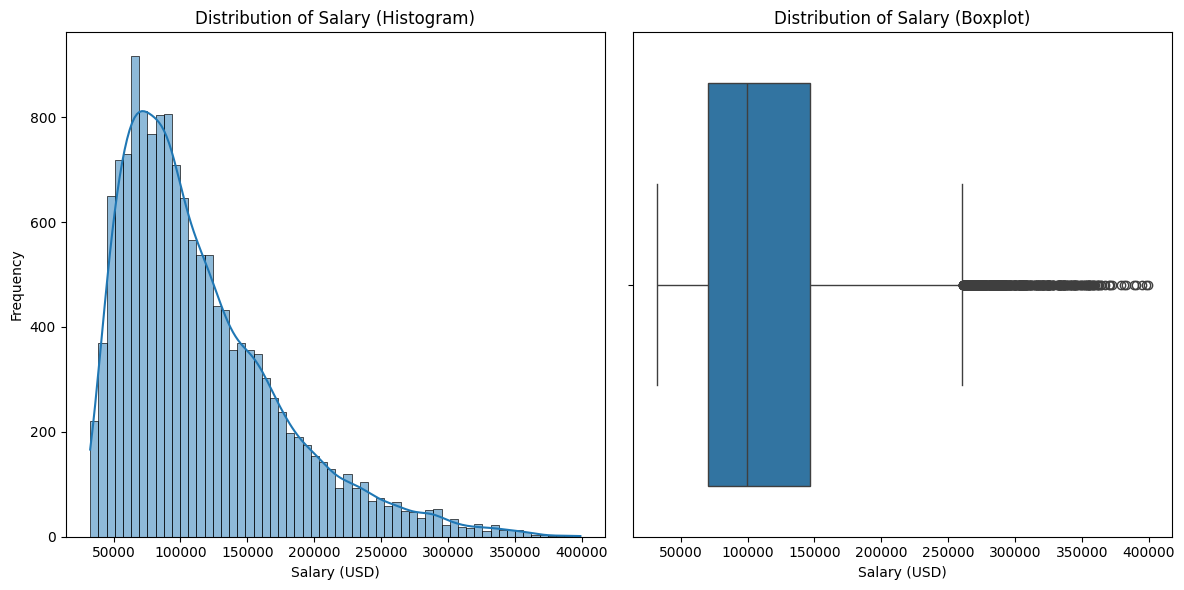

In [97]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['salary_usd'], kde=True)
plt.title('Distribution of Salary (Histogram)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['salary_usd'])
plt.title('Distribution of Salary (Boxplot)')
plt.xlabel('Salary (USD)')

plt.tight_layout()
plt.show()

The *salary_usd* is the only column that may contain outliers affecting overall analysis.

In [98]:
df['salary_usd'].describe()

,salary_usd
count,15000.000000
mean,115348.965133
std,60260.940438
min,32519.000000
25%,70179.750000
50%,99705.000000
75%,146408.500000
max,399095.000000


In [99]:
# Check outliers using IQR
q1 = df['salary_usd'].quantile(0.25)
q3 = df['salary_usd'].quantile(0.75)
iqr = q3 - q1
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

Q1: 70179.75
Q3: 146408.5
IQR: 76228.75


In [100]:
# Dropping outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_clean = df[(df['salary_usd'] >= lower_bound) & (df['salary_usd'] <= upper_bound)]

In [101]:
print('CLEANED DATASET INFO')
df_clean.info()
print('CLEANED DATASET SUMMARY STATISTIC')
df_clean.describe()

CLEANED DATASET INFO
<class 'pandas.core.frame.DataFrame'>
Index: 14517 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_id              14517 non-null  object
 1   job_title           14517 non-null  object
 2   salary_usd          14517 non-null  int64 
 3   experience_level    14517 non-null  object
 4   employment_type     14517 non-null  object
 5   company_location    14517 non-null  object
 6   company_size        14517 non-null  object
 7   employee_residence  14517 non-null  object
 8   remote_ratio        14517 non-null  int64 
 9   required_skills     14517 non-null  object
 10  education_required  14517 non-null  object
 11  years_experience    14517 non-null  int64 
 12  industry            14517 non-null  object
 13  posting_date        14517 non-null  object
dtypes: int64(3), object(11)
memory usage: 1.7+ MB
CLEANED DATASET SUMMARY STATISTIC


,salary_usd,remote_ratio,years_experience
count,14517.000000,14517.000000,14517.000000
mean,109246.604533,49.448922,5.982228
std,50652.355882,40.839387,5.404928
min,32519.000000,0.000000,0.000000
25%,69423.000000,0.000000,1.000000
50%,97365.000000,50.000000,4.000000
75%,140193.000000,100.000000,9.000000
max,260729.000000,100.000000,19.000000


✅ There were 483 outliers detected and removed from the new df_clean.

## 3.4. Change Datatype

In [102]:
# Convert 'posting_date' to datetime
df_clean['posting_date'] = pd.to_datetime(df_clean['posting_date'])

# Optimize data types of other columns using condition loop
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        if df_clean[col].nunique() / len(df_clean) < 0.5:
            df_clean[col] = df_clean[col].astype('category')
        else:
            df_clean[col] = df_clean[col].astype('string')
    elif df_clean[col].dtype == 'int64':
        df_clean[col] = pd.to_numeric(df_clean[col], downcast='integer')
    elif df_clean[col].dtype == 'float64':
        df_clean[col] = pd.to_numeric(df_clean[col], downcast='float')

In [103]:
print('CLEAN DATAFRAME INFO:')
df_clean.info()

CLEAN DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 14517 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   job_id              14517 non-null  string        
 1   job_title           14517 non-null  category      
 2   salary_usd          14517 non-null  int32         
 3   experience_level    14517 non-null  category      
 4   employment_type     14517 non-null  category      
 5   company_location    14517 non-null  category      
 6   company_size        14517 non-null  category      
 7   employee_residence  14517 non-null  category      
 8   remote_ratio        14517 non-null  int8          
 9   required_skills     14517 non-null  string        
 10  education_required  14517 non-null  category      
 11  years_experience    14517 non-null  int8          
 12  industry            14517 non-null  category      
 13  posting_date        14517 non

# IV. EDA PROCESS

## 4.1. Data Summary

In [104]:
print("\nSUMMARY STATISTICS FOR NUMERICAL COLUMNS:")
display(df_clean.describe())

print("\nSUMMARY STATISTICS FOR TEXT/CATEGORICAL COLUMNS:")
display(df_clean.describe(include=['category', 'string']))


SUMMARY STATISTICS FOR NUMERICAL COLUMNS:


,salary_usd,remote_ratio,years_experience,posting_date
count,14517.000000,14517.000000,14517.000000,14517
mean,109246.604533,49.448922,5.982228,2024-08-29 10:17:05.170489600
min,32519.000000,0.000000,0.000000,2024-01-01 00:00:00
25%,69423.000000,0.000000,1.000000,2024-04-29 00:00:00
50%,97365.000000,50.000000,4.000000,2024-08-28 00:00:00
75%,140193.000000,100.000000,9.000000,2024-12-29 00:00:00
max,260729.000000,100.000000,19.000000,2025-04-30 00:00:00
std,50652.355882,40.839387,5.404928,NaN



SUMMARY STATISTICS FOR TEXT/CATEGORICAL COLUMNS:


,job_id,job_title,experience_level,employment_type,company_location,company_size,employee_residence,required_skills,education_required,industry
count,14517,14517,14517,14517,14517,14517,14517,14517,14517,14517
unique,14517,20,4,4,20,3,20,13259,4,15
top,AI00006,Machine Learning Researcher,MI,FT,Germany,S,France,"Python, TensorFlow, PyTorch",Bachelor,Retail
freq,1,777,3781,3689,797,4941,775,17,3671,1024


In [105]:
print('CLEANED DATASET SUMMARY STATISTIC')
display(df_clean.describe(include='all'))

CLEANED DATASET SUMMARY STATISTIC


,job_id,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date
count,14517,14517,14517.000000,14517,14517,14517,14517,14517,14517.000000,14517,14517,14517.000000,14517,14517
unique,14517,20,NaN,4,4,20,3,20,NaN,13259,4,NaN,15,NaN
top,AI00006,Machine Learning Researcher,NaN,MI,FT,Germany,S,France,NaN,"Python, TensorFlow, PyTorch",Bachelor,NaN,Retail,NaN
freq,1,777,NaN,3781,3689,797,4941,775,NaN,17,3671,NaN,1024,NaN
mean,NaN,NaN,109246.604533,NaN,NaN,NaN,NaN,NaN,49.448922,NaN,NaN,5.982228,NaN,2024-08-29 10:17:05.170489600
min,NaN,NaN,32519.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,2024-01-01 00:00:00
25%,NaN,NaN,69423.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,2024-04-29 00:00:00
50%,NaN,NaN,97365.000000,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,4.000000,NaN,2024-08-28 00:00:00
75%,NaN,NaN,140193.000000,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,9.000000,NaN,2024-12-29 00:00:00
max,NaN,NaN,260729.000000,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,19.000000,NaN,2025-04-30 00:00:00


### Count & Rank of unique values

In [106]:
columns_to_count = ['job_title', 'experience_level', 'employment_type', 'company_location', 'company_size',
                       'employee_residence', 'remote_ratio',
                       'education_required', 'years_experience', 'industry']
# Use loop to count all unique values of each columns and print the result in decreasing order
for col in columns_to_count:
    if col in df_clean.columns:
        print(f"Number of unique '{col}':")
        print(df_clean[col].nunique())
        print(f"Unique Counts for '{col}':")
        print(df_clean[col].value_counts())
        print("\n")
    else:
        print(f"Column '{col}' not found in the DataFrame.")
        print("\n")

Number of unique 'job_title':
20
Unique Counts for 'job_title':
job_title
Machine Learning Researcher    777
Autonomous Systems Engineer    764
AI Software Engineer           763
AI Architect                   740
Robotics Engineer              740
Head of AI                     739
NLP Engineer                   739
Machine Learning Engineer      739
Data Analyst                   738
Data Engineer                  734
AI Research Scientist          723
AI Product Manager             718
Research Scientist             717
Principal Data Scientist       708
Computer Vision Engineer       702
ML Ops Engineer                701
Data Scientist                 700
Deep Learning Engineer         694
AI Specialist                  694
AI Consultant                  687
Name: count, dtype: int64


Number of unique 'experience_level':
4
Unique Counts for 'experience_level':
experience_level
MI    3781
SE    3741
EN    3718
EX    3277
Name: count, dtype: int64


Number of unique 'employment_typ

## 4.2. UNIVARIATE ANALYSIS

### 1. Salary Distribution

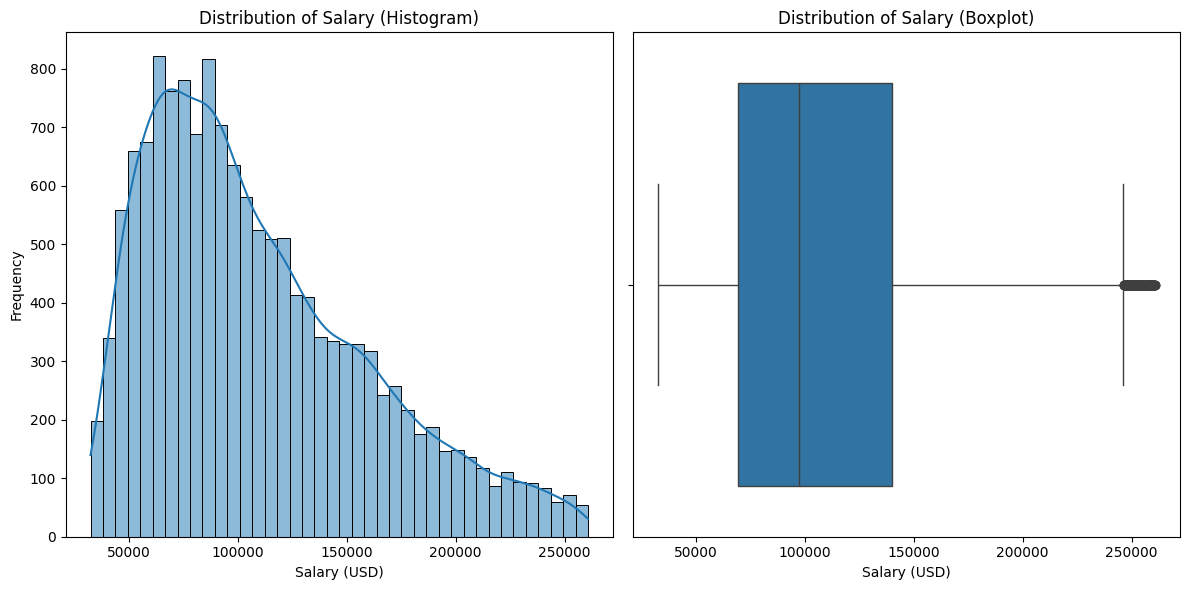

In [107]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['salary_usd'], kde=True)
plt.title('Distribution of Salary (Histogram)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['salary_usd'])
plt.title('Distribution of Salary (Boxplot)')
plt.xlabel('Salary (USD)')

plt.tight_layout()
plt.show()

### 2. Skill Count

In [108]:
# Spliting skills in the 'required_skills' column into a new column 'required_skills_list'
df_clean['required_skills_list'] = df_clean['required_skills'].str.split(', ')

In [109]:
# Counting the frequency of each skill in the new 'required_skills_list' column
all_skills = [skill for sublist in df_clean['required_skills_list'] for skill in sublist]
from collections import Counter
skill_counts = Counter(all_skills)
# Creating a dataframe for skills counter
skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])
skill_df = skill_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
skill_df

,Skill,Count
0,Python,4313
1,SQL,3307
2,TensorFlow,2923
3,Kubernetes,2918
4,Scala,2702
5,PyTorch,2681
6,Linux,2609
7,Git,2549
8,Java,2495
9,GCP,2365


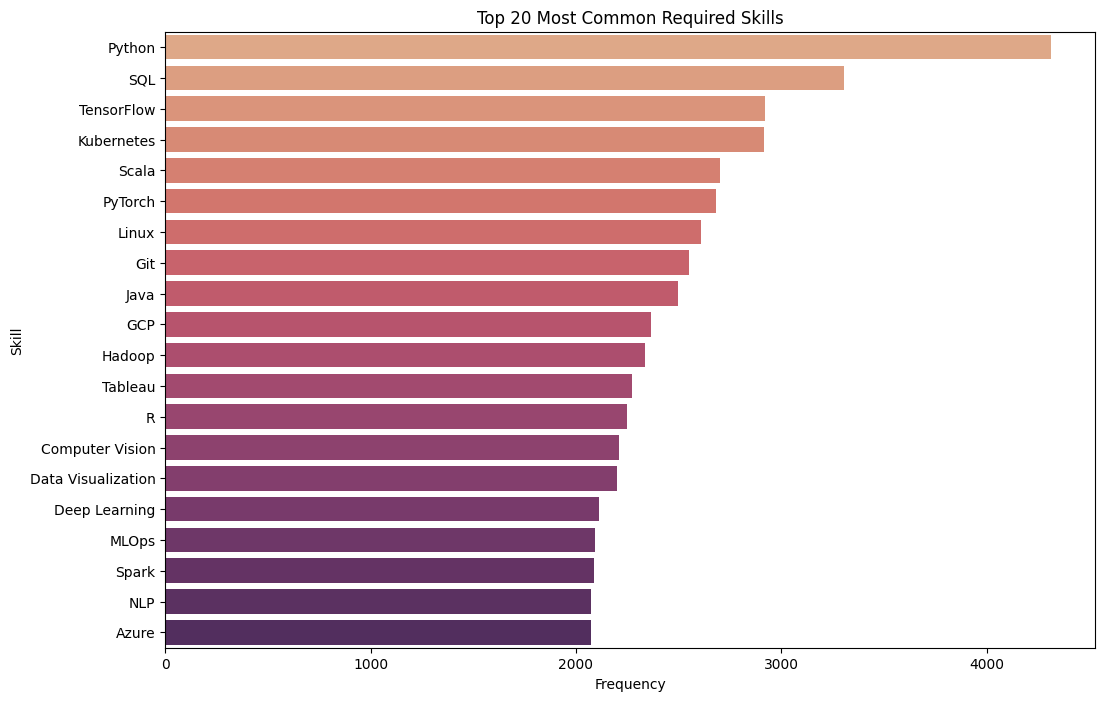

In [110]:
# Visualise the skill_df
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Skill', data=skill_df.head(20), palette='flare')
plt.title('Top 20 Most Common Required Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.show()

🖊 Popular languages like Python and SQL easily the most frequent, while statistic and math skills seems to be not a key distributor

### 3. Experience Years Distribution

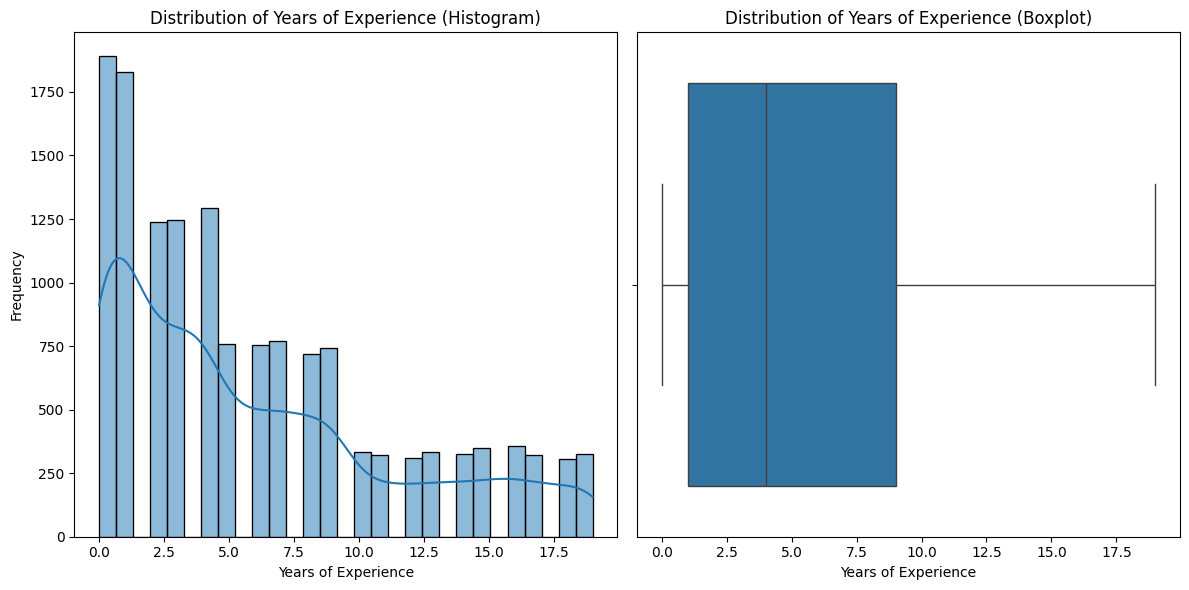

In [111]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['years_experience'], kde=True)
plt.title('Distribution of Years of Experience (Histogram)')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['years_experience'])
plt.title('Distribution of Years of Experience (Boxplot)')
plt.xlabel('Years of Experience')

plt.tight_layout()
plt.show()

### 4. Remote Ratio Frequnecy

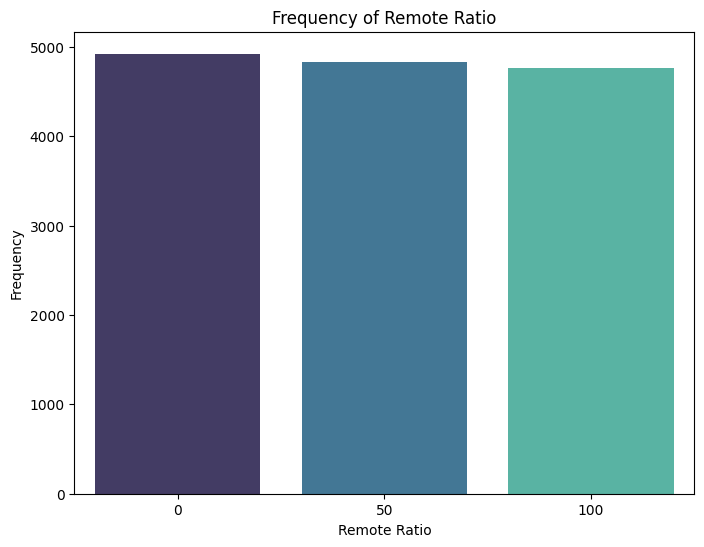

In [112]:
remote_ratio_counts = df_clean['remote_ratio'].value_counts().reset_index()
remote_ratio_counts.columns = ['Remote Ratio', 'Frequency']

plt.figure(figsize=(8, 6))
sns.barplot(x='Remote Ratio', y='Frequency', data=remote_ratio_counts, palette='mako')
plt.title('Frequency of Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Frequency')
plt.show()

### 5. Company Location/Region

#### Creating Region Column for better Analysis

In [113]:
def get_region(location):
    asia = ['China', 'India',
            'Singapore', 'South Korea',
            'Israel', 'Japan', 'Australia']
    america = ['Canada', 'United States']
    europe = ['Switzerland', 'France',
              'Germany', 'United Kingdom',
              'Austria', 'Sweden', 'Norway',
              'Netherlands', 'Ireland',
              'Denmark', 'Finland']
    if location in asia:
        return 'Asia'
    elif location in america:
        return 'America'
    elif location in europe:
        return 'Europe'
    else:
        return 'Other'
df_clean['region'] = df_clean['company_location'].apply(get_region)
display(df_clean.head())
print(df_clean['region'].value_counts())

,job_id,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,required_skills_list,region
0,AI00001,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,"[Tableau, PyTorch, Kubernetes, Linux, NLP]",Asia
1,AI00002,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,"[Deep Learning, AWS, Mathematics, Python, Docker]",America
2,AI00003,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,"[Kubernetes, Deep Learning, Java, Hadoop, NLP]",Europe
3,AI00004,NLP Engineer,80215,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,"[Scala, SQL, Linux, Python]",Asia
4,AI00005,AI Consultant,54624,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,"[MLOps, Java, Tableau, Python]",Europe


region
Europe     7902
Asia       5190
America    1425
Name: count, dtype: int64


## 4.3. BIVARIATE ANALYSIS

### Salary & Experience Years

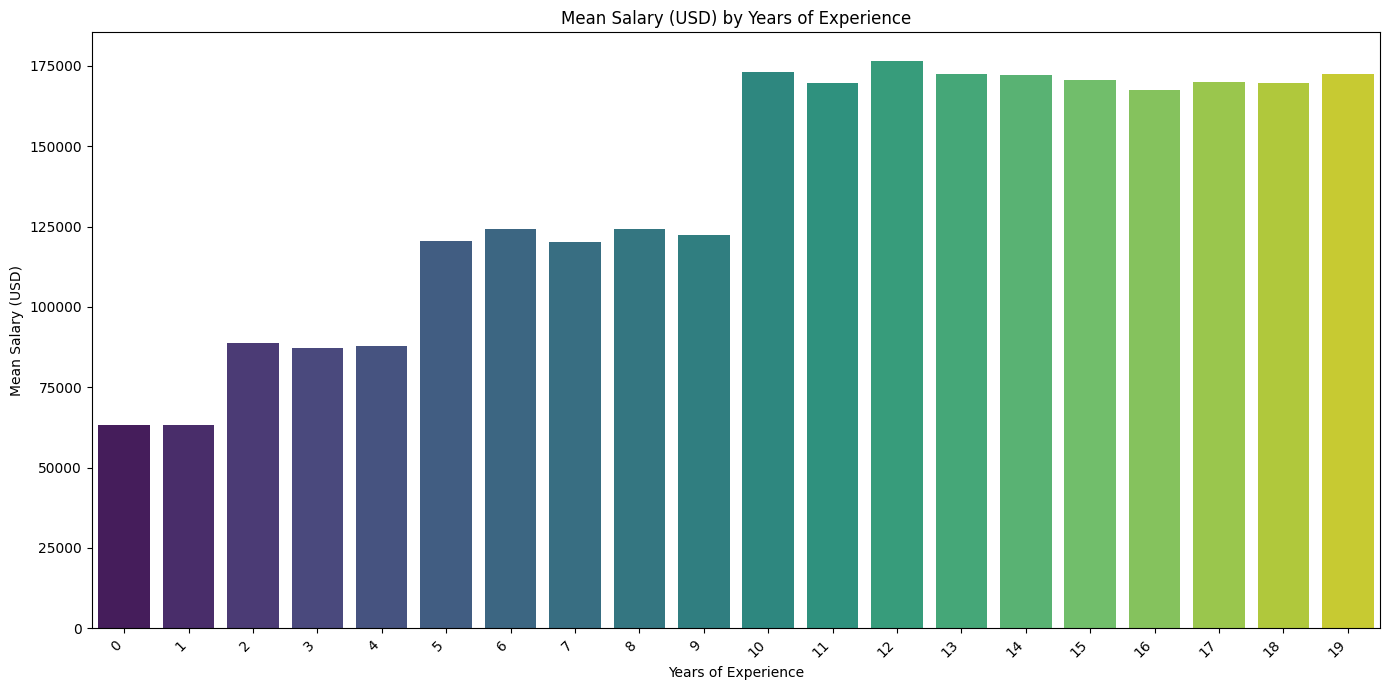

In [114]:
# Mean salary distribution among experience years
mean_salary_by_experience = df_clean.groupby('years_experience')['salary_usd'].mean().reset_index()
mean_salary_by_experience = mean_salary_by_experience.sort_values(by='salary_usd', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='years_experience', y='salary_usd', data=mean_salary_by_experience, palette='viridis')
plt.title('Mean Salary (USD) by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Mean Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average Salary by Experience Level:
experience_level
EX    171357.764724
SE    122187.657845
MI     87955.471833
EN     63133.377084
Name: salary_usd, dtype: float64


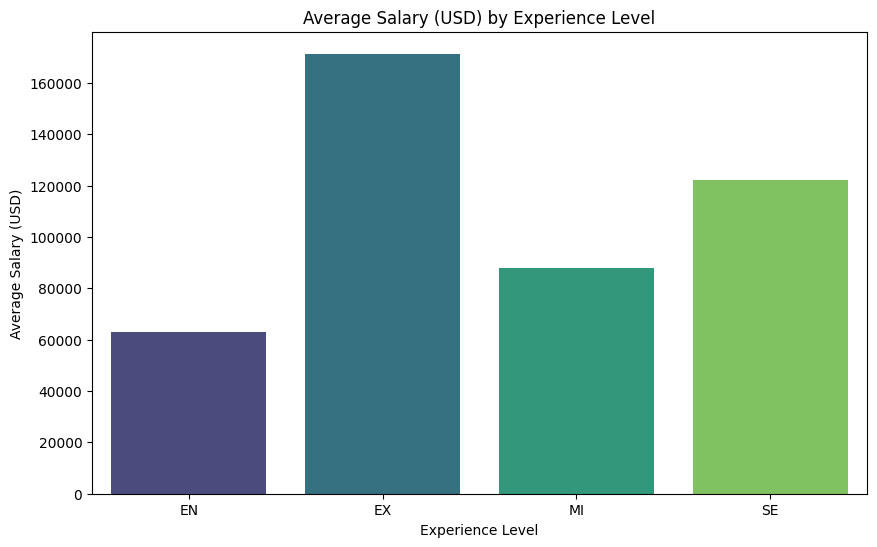

In [115]:
# prompt: calculate avg salary by experience level

# Calculate average salary by experience level
avg_salary_by_experience = df_clean.groupby('experience_level')['salary_usd'].mean().sort_values(ascending=False)

print("\nAverage Salary by Experience Level:")
print(avg_salary_by_experience)

# Visualize average salary by experience level
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_experience.index, y=avg_salary_by_experience.values, palette='viridis')
plt.title('Average Salary (USD) by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()

In [116]:
# Calculate average salary for each experience level
avg_salary_by_experience = df_clean.groupby('experience_level')['salary_usd'].mean().reset_index()

# Ensure the order of experience levels
level_order = ['EN', 'MI', 'SE', 'EX']  # Corrected order
avg_salary_by_experience['experience_level'] = pd.Categorical(avg_salary_by_experience['experience_level'], categories=level_order, ordered=True)
avg_salary_by_experience = avg_salary_by_experience.sort_values('experience_level')

# Calculate growth percentages by accessing values using labels after sorting
en_salary = avg_salary_by_experience[avg_salary_by_experience['experience_level'] == 'EN']['salary_usd'].iloc[0]
mi_salary = avg_salary_by_experience[avg_salary_by_experience['experience_level'] == 'MI']['salary_usd'].iloc[0]
se_salary = avg_salary_by_experience[avg_salary_by_experience['experience_level'] == 'SE']['salary_usd'].iloc[0]
ex_salary = avg_salary_by_experience[avg_salary_by_experience['experience_level'] == 'EX']['salary_usd'].iloc[0]


en_mi_growth = ((mi_salary - en_salary) / en_salary) * 100
mi_se_growth = ((se_salary - mi_salary) / mi_salary) * 100
se_ex_growth = ((ex_salary - se_salary) / se_salary) * 100


print(f"Percentage salary growth from Entry-level to Mid-level: {en_mi_growth:.2f}%")
print(f"Percentage salary growth from Mid-level to Senior-level: {mi_se_growth:.2f}%")
print(f"Percentage salary growth from Senior-level to Executive-level: {se_ex_growth:.2f}%")

Percentage salary growth from Entry-level to Mid-level: 39.32%
Percentage salary growth from Mid-level to Senior-level: 38.92%
Percentage salary growth from Senior-level to Executive-level: 40.24%


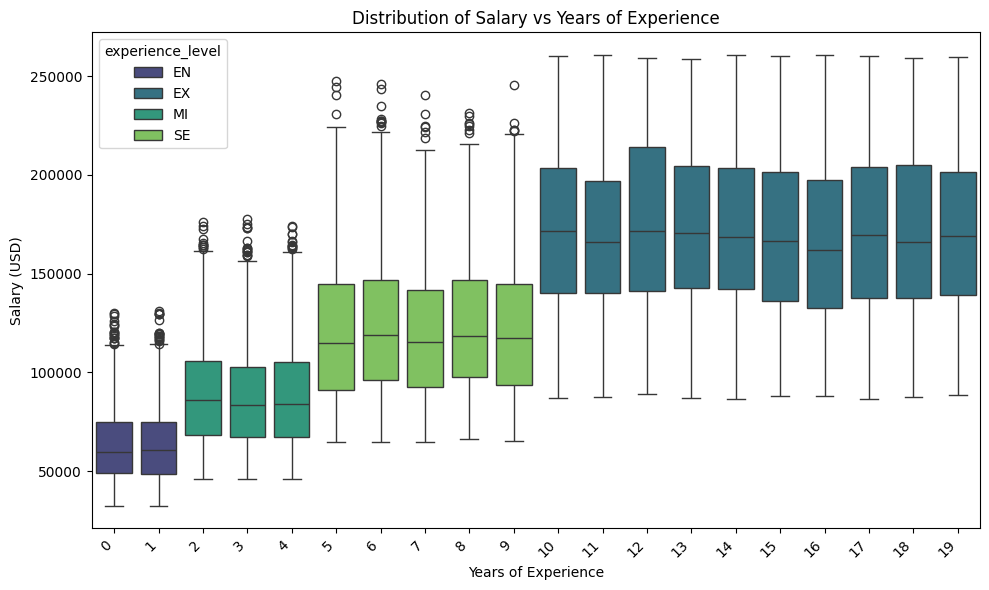

In [117]:
# Distribution of Salary vs Years of Experience
plt.figure(figsize=(10, 6))
sns.boxplot(x='years_experience', y='salary_usd', data=df_clean, hue='experience_level', palette='viridis')
plt.title('Distribution of Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Salary & Experience Level

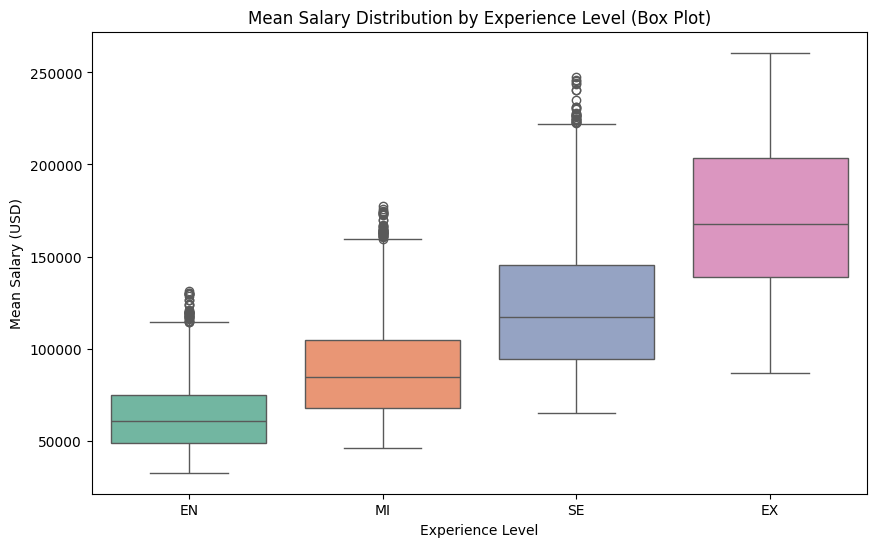

In [118]:
plt.figure(figsize=(10, 6))
experience_order = ['EN', 'MI', 'SE', 'EX']
sns.boxplot(x='experience_level', y='salary_usd', data=df_clean, palette='Set2', order=experience_order)
plt.title('Mean Salary Distribution by Experience Level (Box Plot)')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.show()

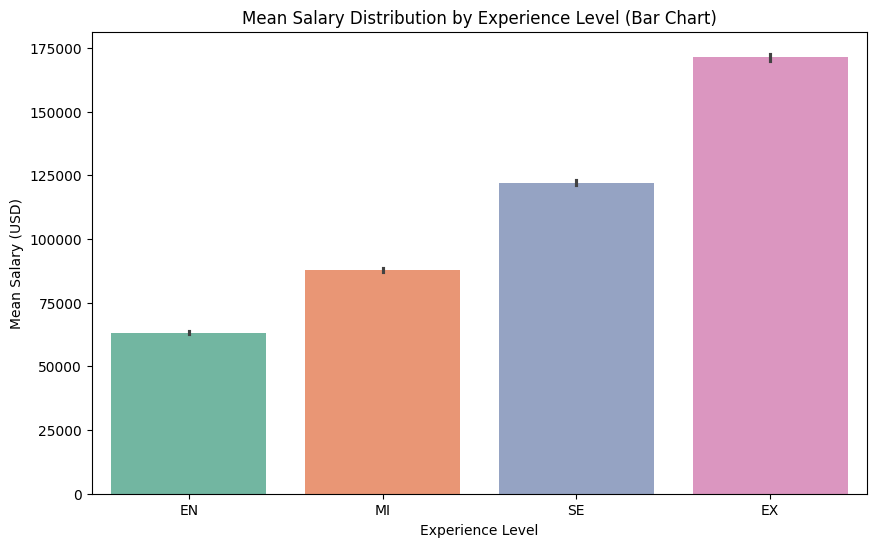

In [119]:
mean_salary_by_level = df_clean.groupby('experience_level')['salary_usd'].mean().reset_index()
mean_salary_by_level = mean_salary_by_level.sort_values(by='experience_level', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_usd', data=df_clean, palette='Set2', order=experience_order)
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary Distribution by Experience Level (Bar Chart)')
plt.show()

### Salary & Region

#### Salary Distribution among Regions

Text(0, 0.5, 'Salary')

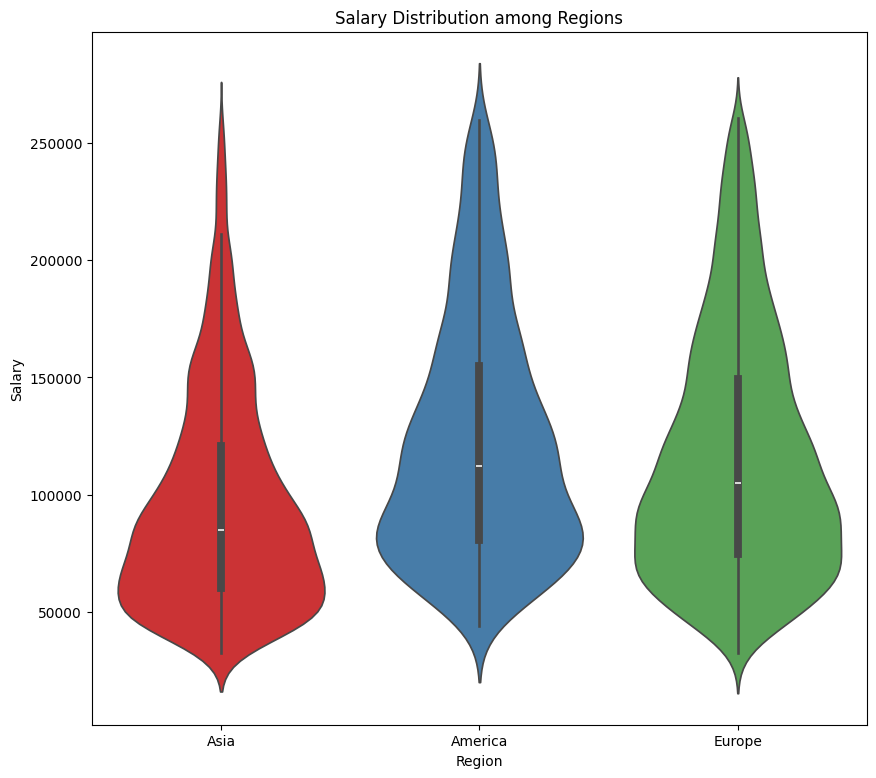

In [120]:
plt.figure(figsize=(10, 9))
sns.violinplot(x='region', y='salary_usd', data=df_clean, palette='Set1')
plt.title('Salary Distribution among Regions')
plt.xlabel('Region')
plt.ylabel('Salary')

#### Salary Distribution by Company Location

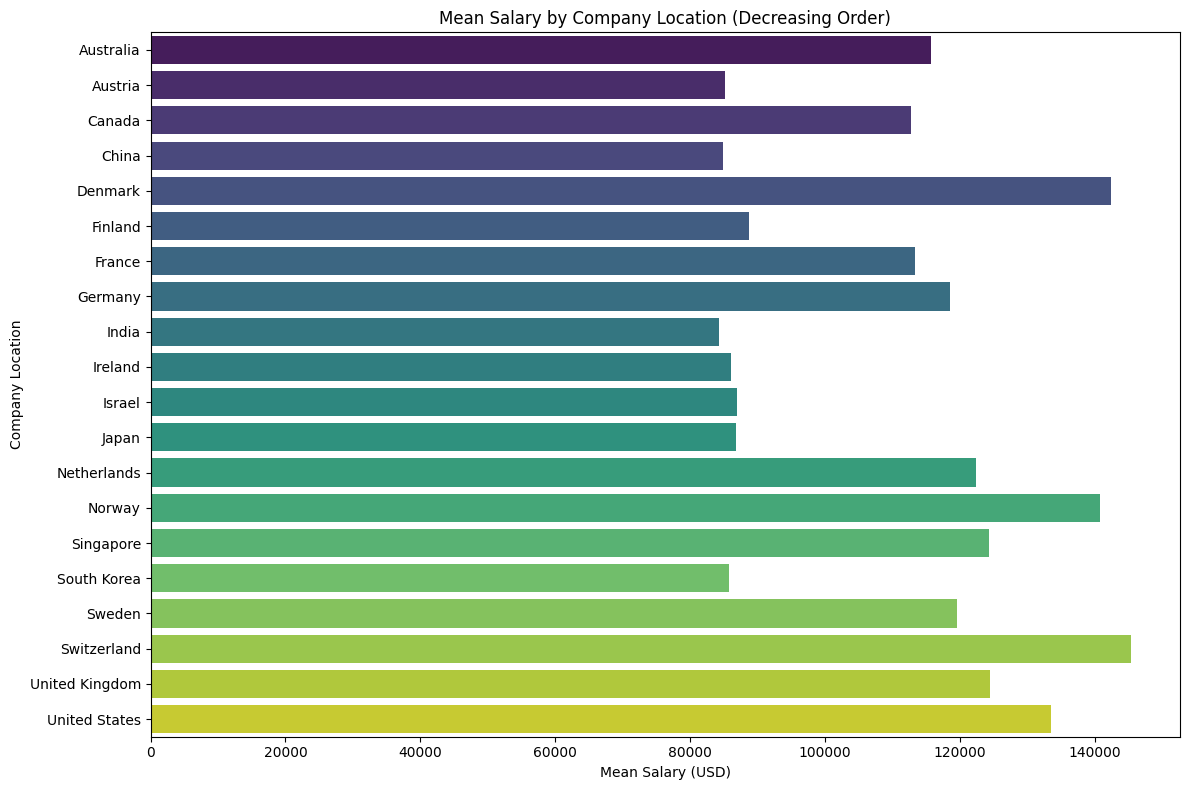

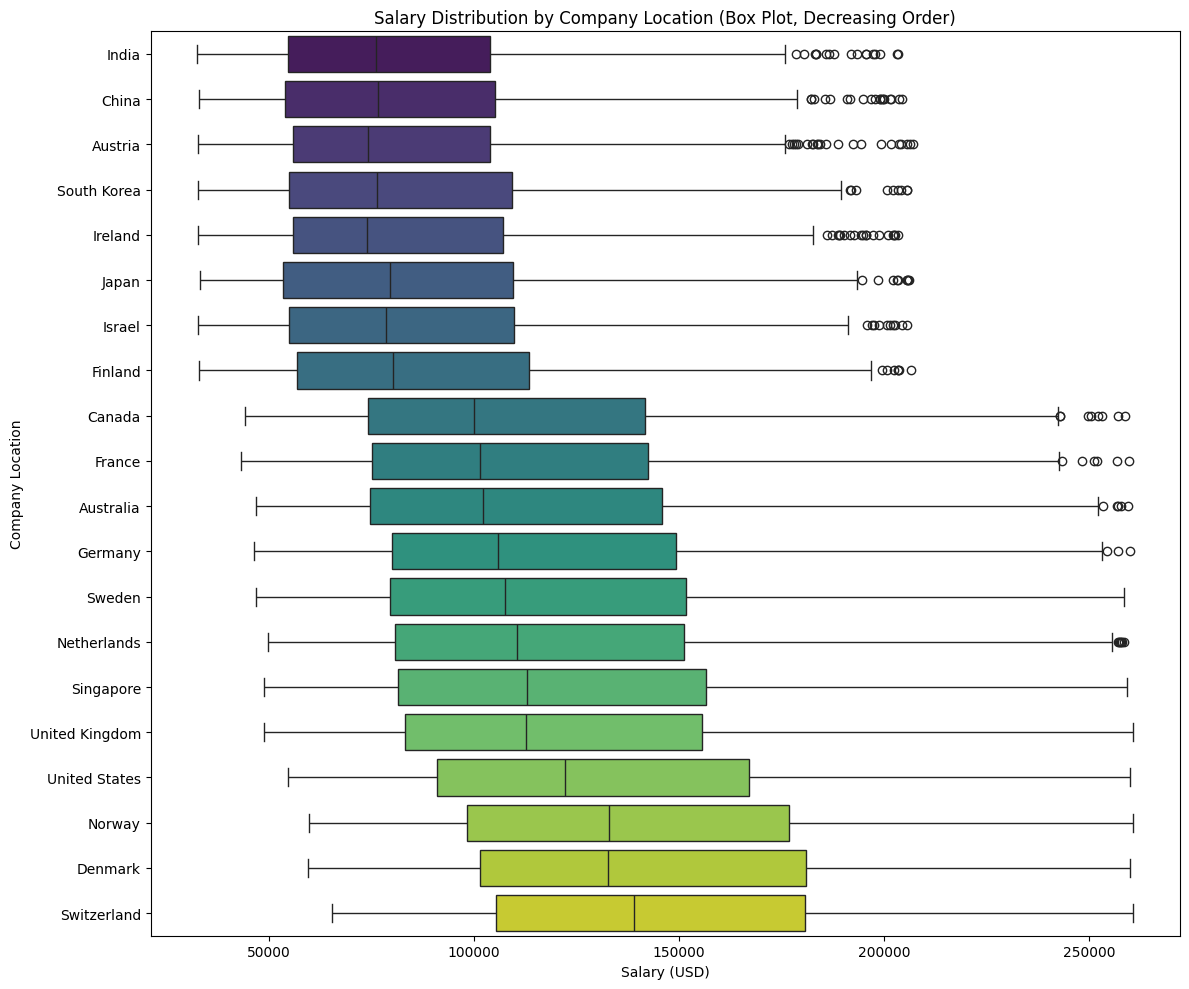

In [121]:
# Bar chart
mean_salary_by_location = df_clean.groupby('company_location')['salary_usd'].mean().reset_index()
mean_salary_by_location = mean_salary_by_location.sort_values(by='salary_usd', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='salary_usd', y='company_location', data=mean_salary_by_location, palette='viridis')
plt.title('Mean Salary by Company Location (Decreasing Order)')
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Company Location')
plt.tight_layout()
plt.show()

# Box plot
location_order = mean_salary_by_location['company_location'].tolist()
df_clean['company_location'] = pd.Categorical(df_clean['company_location'], categories=location_order, ordered=True)

plt.figure(figsize=(12, 10))
sns.boxplot(x='salary_usd', y='company_location', data=df_clean, palette='viridis')
plt.title('Salary Distribution by Company Location (Box Plot, Decreasing Order)')
plt.xlabel('Salary (USD)')
plt.ylabel('Company Location')
plt.tight_layout()
plt.show()

### Salary & Company Size

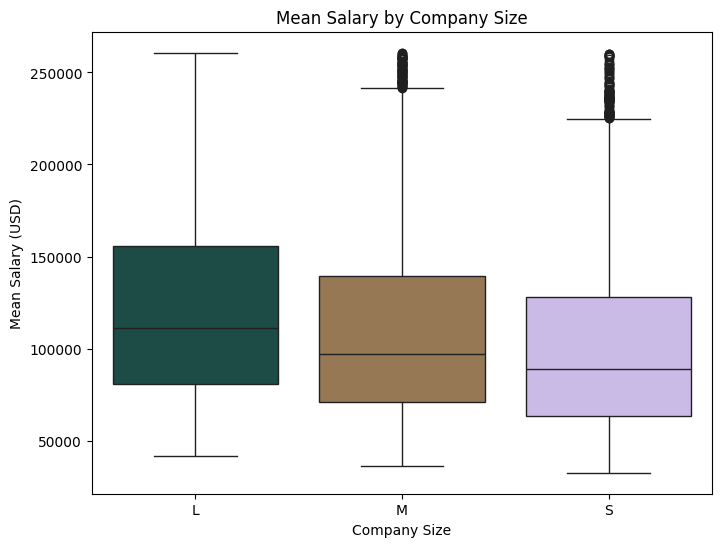

In [122]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='company_size', y='salary_usd', data=df_clean, palette='cubehelix')
plt.title('Mean Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Mean Salary (USD)')
plt.show()

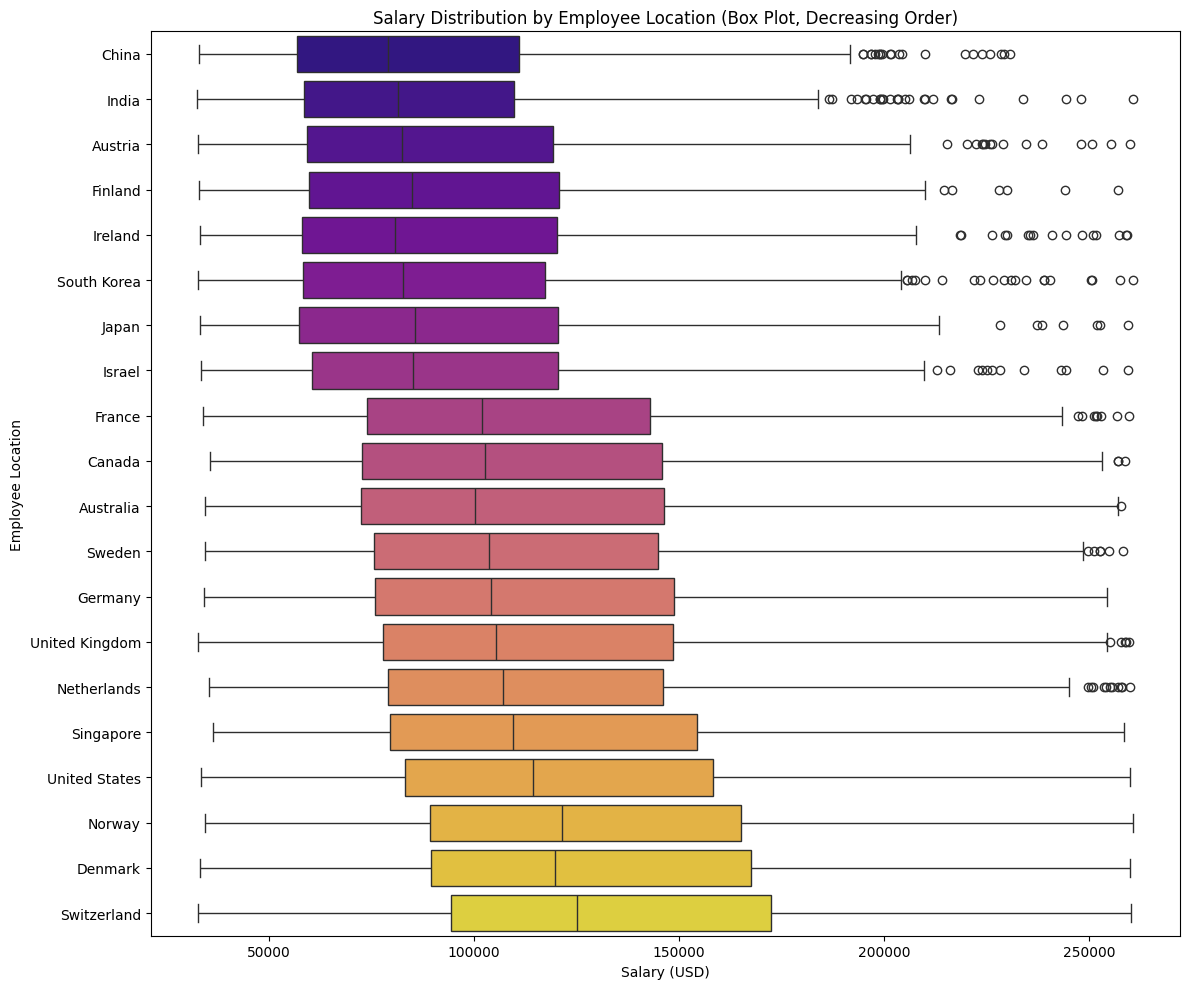

In [123]:
mean_salary_by_employee_residence = df_clean.groupby('employee_residence')['salary_usd'].mean().reset_index()
mean_salary_by_employee_residence = mean_salary_by_employee_residence.sort_values(by='salary_usd', ascending=True)
location_order = mean_salary_by_employee_residence['employee_residence'].tolist()

df_clean['employee_residence'] = pd.Categorical(df_clean['employee_residence'], categories=location_order, ordered=True)
plt.figure(figsize=(12, 10))
sns.boxplot(x='salary_usd', y='employee_residence', data=df_clean, palette='plasma')
plt.title('Salary Distribution by Employee Location (Box Plot, Decreasing Order)')
plt.xlabel('Salary (USD)')
plt.ylabel('Employee Location')
plt.tight_layout()
plt.show()

### Salary & Remote Ratio

Text(0, 0.5, 'Mean Salary (USD)')

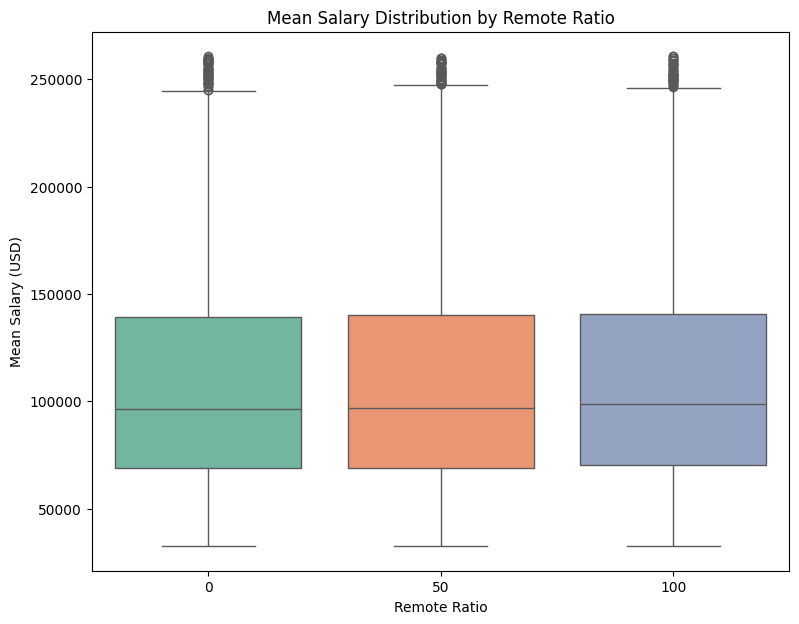

In [124]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='remote_ratio', y='salary_usd', data=df_clean, palette='Set2')
plt.title('Mean Salary Distribution by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Mean Salary (USD)')

### Salary & Skills

In [125]:
df_exploded = df_clean.explode('required_skills_list')

avg_salary_by_skill = (
    df_exploded.groupby('required_skills_list')['salary_usd']
    .agg(['count', 'mean'])
    .sort_values(by='mean', ascending=False)
    .reset_index()
    .rename(columns={
        'required_skills_list': 'Skill',
        'count': 'Job Count',
        'mean': 'Average Salary'
    })
)
avg_salary_by_skill

,Skill,Job Count,Average Salary
0,Scala,2702,110916.733531
1,Git,2549,110839.860730
2,Deep Learning,2111,110538.741355
3,Docker,1796,110196.976058
4,NLP,2075,110086.896867
5,GCP,2365,109928.942495
6,Computer Vision,2211,109821.903664
7,Data Visualization,2200,109813.570000
8,Kubernetes,2918,109420.045579
9,Hadoop,2338,109408.392216


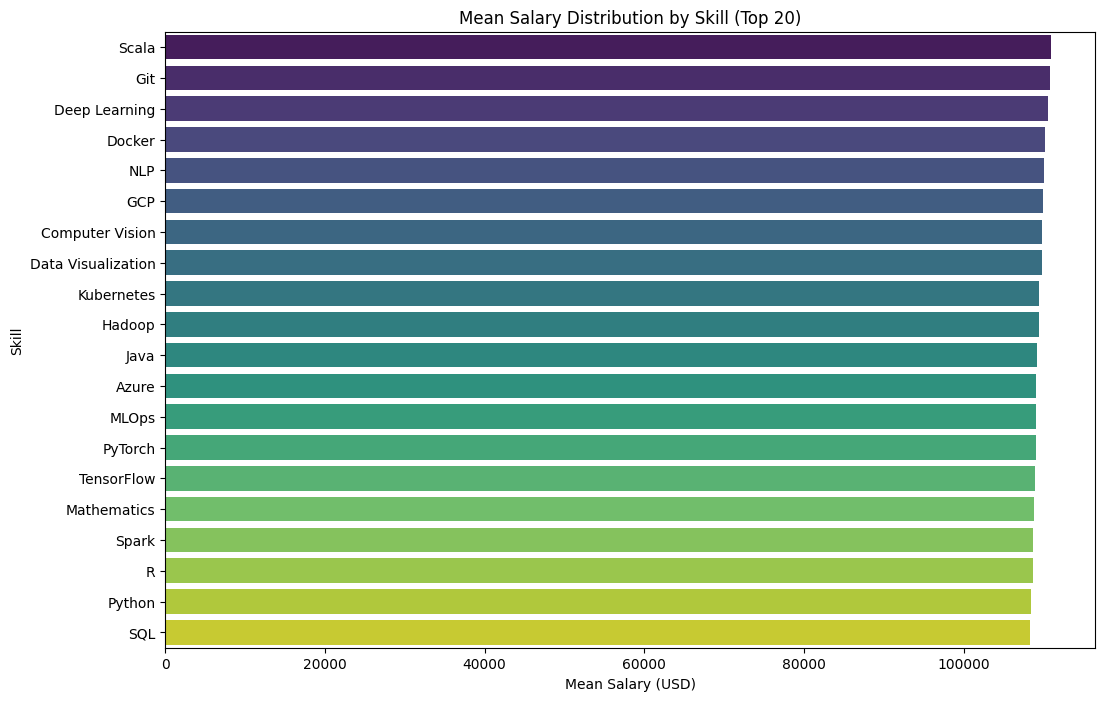

In [126]:
avg_salary_by_skill = df_exploded.groupby('required_skills_list')['salary_usd'].mean().reset_index()
avg_salary_by_skill = avg_salary_by_skill.sort_values(by='salary_usd', ascending=False)

top_n = 20
top_skills_salary = avg_salary_by_skill.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x='salary_usd', y='required_skills_list', data=top_skills_salary, palette='viridis')
plt.title(f'Mean Salary Distribution by Skill (Top {top_n})')
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Skill')
plt.show()

### Salary & Industry

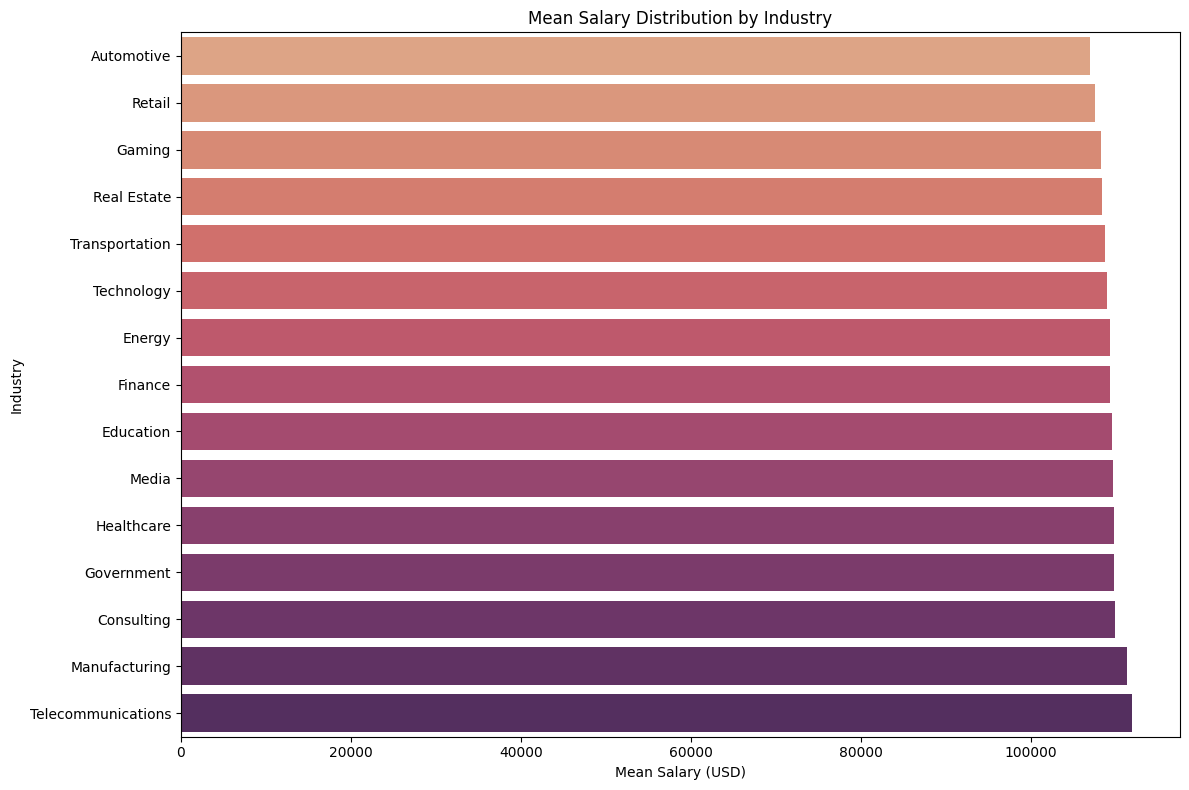

In [127]:
mean_salary_by_industry = df_clean.groupby('industry')['salary_usd'].mean().reset_index()
mean_salary_by_industry = mean_salary_by_industry.sort_values('salary_usd', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='salary_usd', y='industry', data=mean_salary_by_industry, palette='flare', order=mean_salary_by_industry['industry'])
plt.title('Mean Salary Distribution by Industry')
plt.xlabel('Mean Salary (USD)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

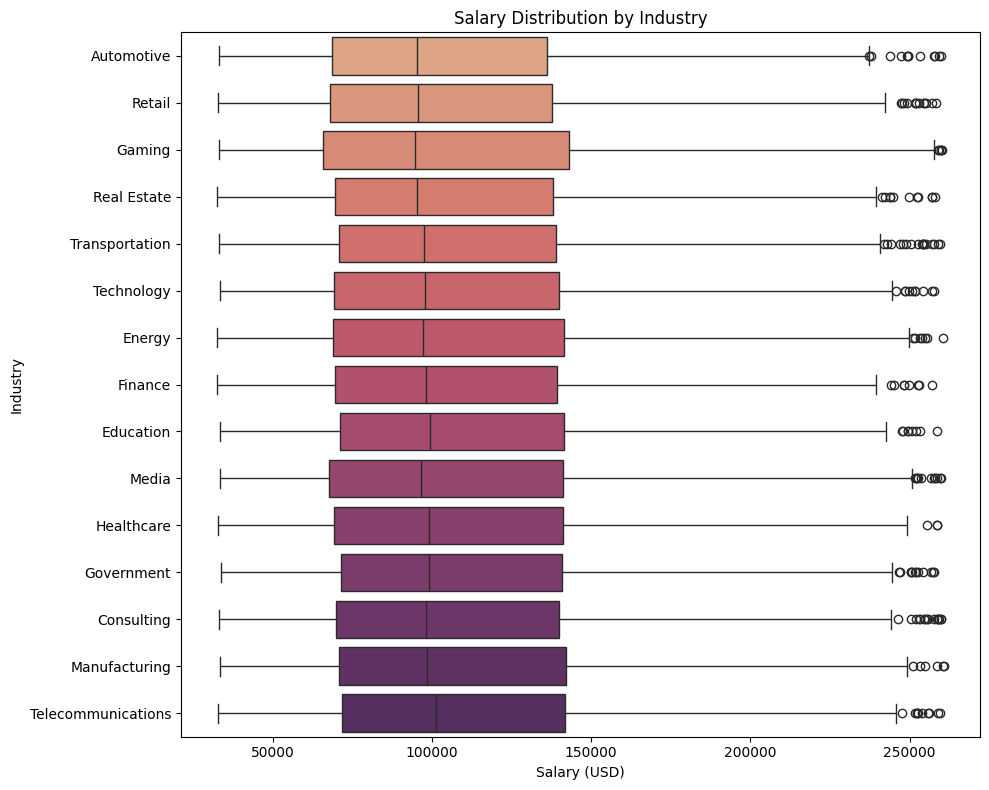

In [128]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='salary_usd', y='industry', data=df_clean, palette='flare', order=mean_salary_by_industry['industry'])
plt.title('Salary Distribution by Industry')
plt.xlabel('Salary (USD)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

### Salary & Education

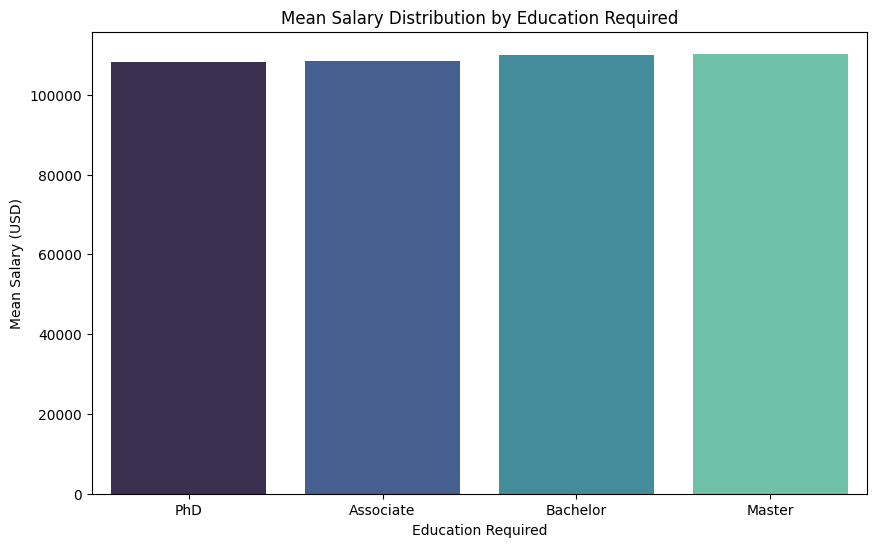

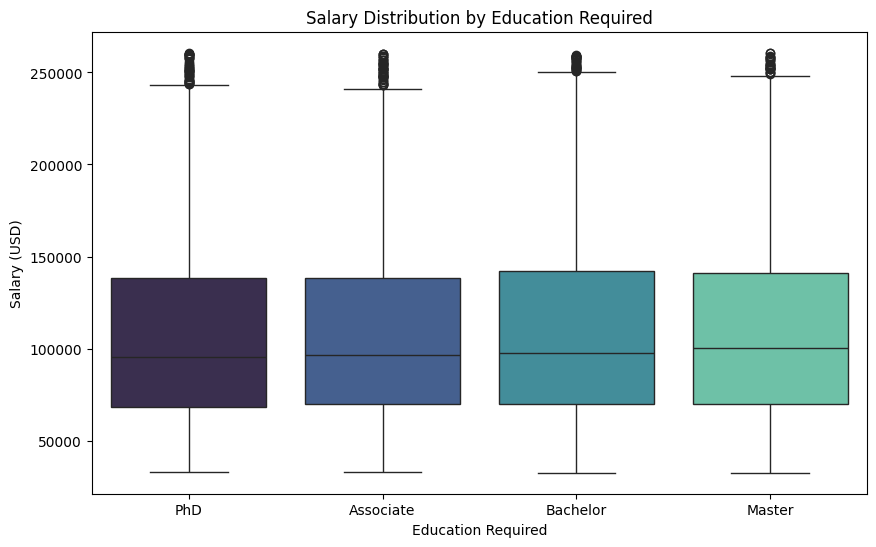

In [129]:
mean_salary_by_education = df_clean.groupby('education_required')['salary_usd'].mean().reset_index()
mean_salary_by_education = mean_salary_by_education.sort_values('salary_usd', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='education_required', y='salary_usd', data=mean_salary_by_education, palette='mako', order=mean_salary_by_education['education_required'])
plt.title('Mean Salary Distribution by Education Required')
plt.xlabel('Education Required')
plt.ylabel('Mean Salary (USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='education_required', y='salary_usd', data=df_clean, palette='mako', order=mean_salary_by_education['education_required'])
plt.title('Salary Distribution by Education Required')
plt.xlabel('Education Required')
plt.ylabel('Salary (USD)')
plt.show()

## 4.4. MULTIVARIATE ANALYSIS

### salary_usd distribution among experience_level in different company_size

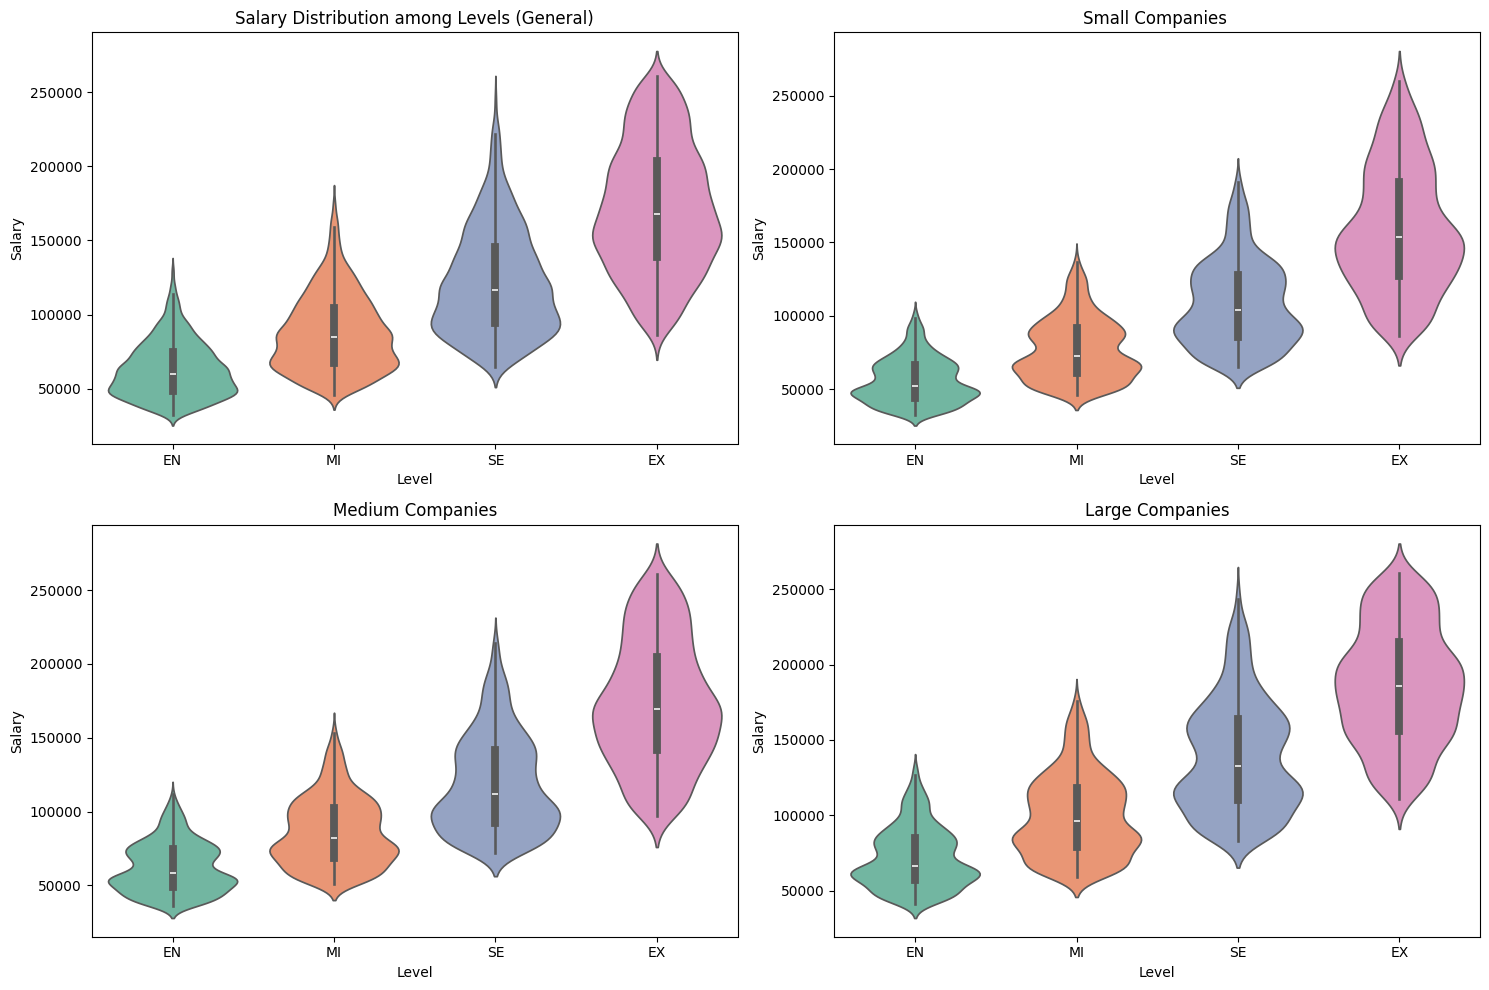

In [130]:
# Separate data based on company size
df_small = df_clean[df_clean['company_size'] == 'S']
df_medium = df_clean[df_clean['company_size'] == 'M']
df_large = df_clean[df_clean['company_size'] == 'L']

# Create the violin plots for each company size
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.violinplot(x='experience_level', y='salary_usd', data=df_clean, palette='Set2', order=experience_order)
plt.title('Salary Distribution among Levels (General)')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.subplot(2, 2, 2)
sns.violinplot(x='experience_level', y='salary_usd', data=df_small, palette='Set2', order=experience_order)
plt.title('Small Companies ')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.subplot(2, 2, 3)
sns.violinplot(x='experience_level', y='salary_usd', data=df_medium, palette='Set2', order=experience_order)
plt.title('Medium Companies')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.subplot(2, 2, 4)
sns.violinplot(x='experience_level', y='salary_usd', data=df_large, palette='Set2', order=experience_order)
plt.title('Large Companies')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()

### Salary distribution among level of different regions

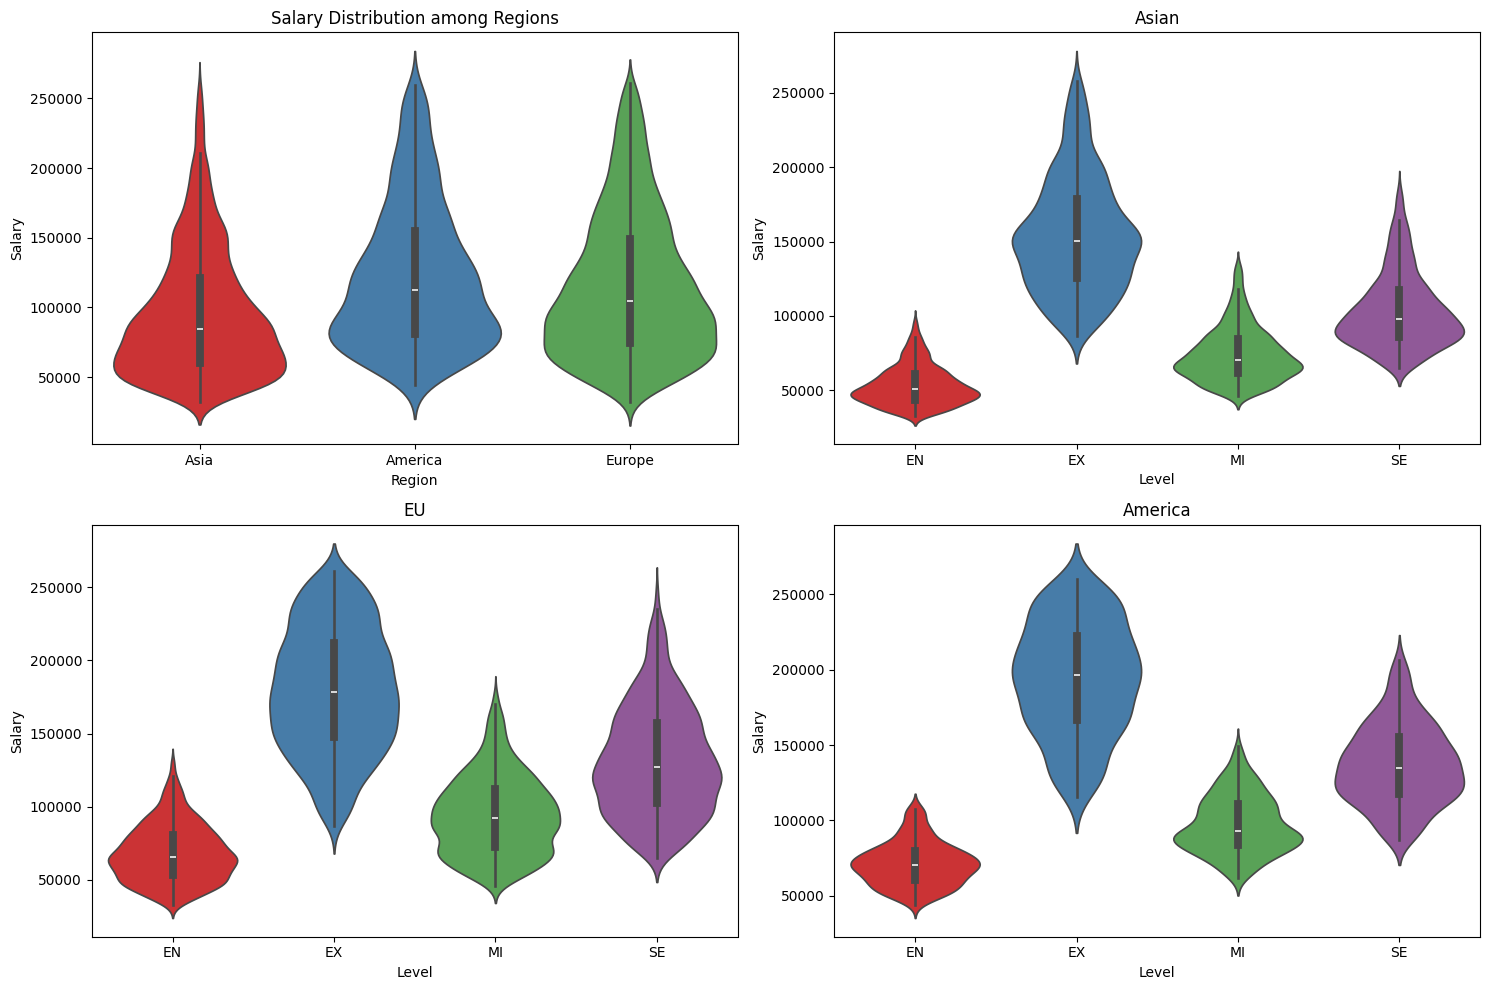

In [131]:
df_asia = df_clean[df_clean['region'] == 'Asia']
df_eur = df_clean[df_clean['region'] == 'Europe']
df_america = df_clean[df_clean['region'] == 'America']

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.violinplot(x='region', y='salary_usd', data=df_clean, palette='Set1')
plt.title('Salary Distribution among Regions')
plt.xlabel('Region')
plt.ylabel('Salary')


plt.subplot(2, 2, 2)
sns.violinplot(x='experience_level', y='salary_usd', data=df_asia, palette='Set1')
plt.title('Asian')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.subplot(2, 2, 3)
sns.violinplot(x='experience_level', y='salary_usd', data=df_eur, palette='Set1')
plt.title('EU')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.subplot(2, 2, 4)
sns.violinplot(x='experience_level', y='salary_usd', data=df_america, palette='Set1')
plt.title('America')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()

### Average Salary by Remote Ratio in Different Region


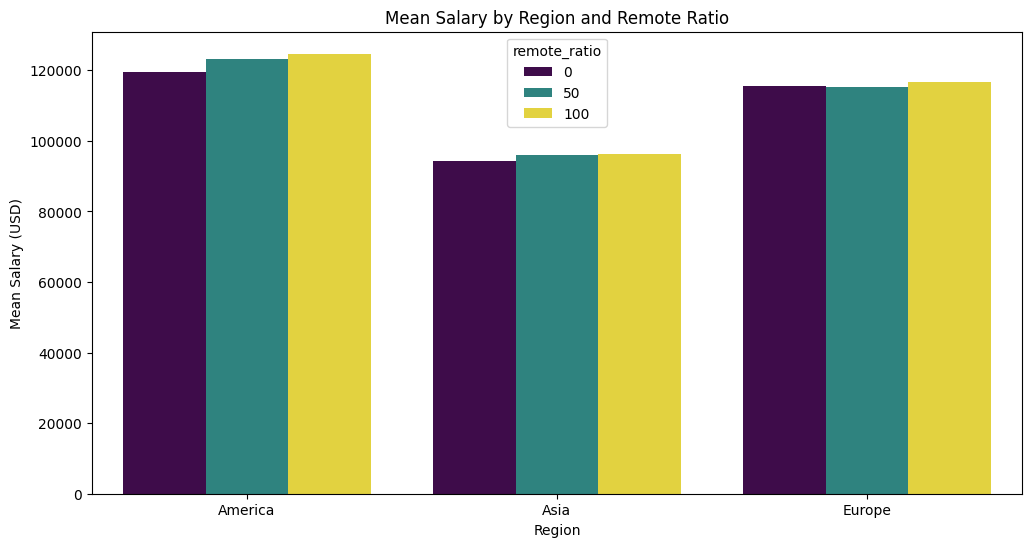

In [132]:
salary_by_region_remote = df_clean.groupby(['region', 'remote_ratio'])['salary_usd'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='salary_usd', hue='remote_ratio', data=salary_by_region_remote, palette='viridis')
plt.title('Mean Salary by Region and Remote Ratio')
plt.xlabel('Region')
plt.ylabel('Mean Salary (USD)')
plt.show()

### Top Salaries of Job Titles by Remote Ratio

In [133]:
def print_top_job_titles_by_remote_ratio(df):
  for ratio in df['remote_ratio'].unique():
    print(f"\nTop 5 Job Titles with Highest Salary for Remote Ratio: {ratio}")
    df_filtered = df[df['remote_ratio'] == ratio]
    top_jobs = df_filtered.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False).head(5)
    display(top_jobs)

print_top_job_titles_by_remote_ratio(df_clean)


Top 5 Job Titles with Highest Salary for Remote Ratio: 50


,salary_usd
job_title,
Data Scientist,115256.152263
ML Ops Engineer,112999.744589
Head of AI,112755.287449
Research Scientist,111443.087866
Robotics Engineer,111226.287938



Top 5 Job Titles with Highest Salary for Remote Ratio: 100


,salary_usd
job_title,
Robotics Engineer,115310.837104
Data Engineer,115258.035019
AI Consultant,115001.472103
Principal Data Scientist,113076.602510
AI Specialist,113057.438819



Top 5 Job Titles with Highest Salary for Remote Ratio: 0


,salary_usd
job_title,
Head of AI,114939.828996
AI Software Engineer,112702.909465
Data Engineer,112336.798419
ML Ops Engineer,110790.693966
AI Specialist,110709.987179


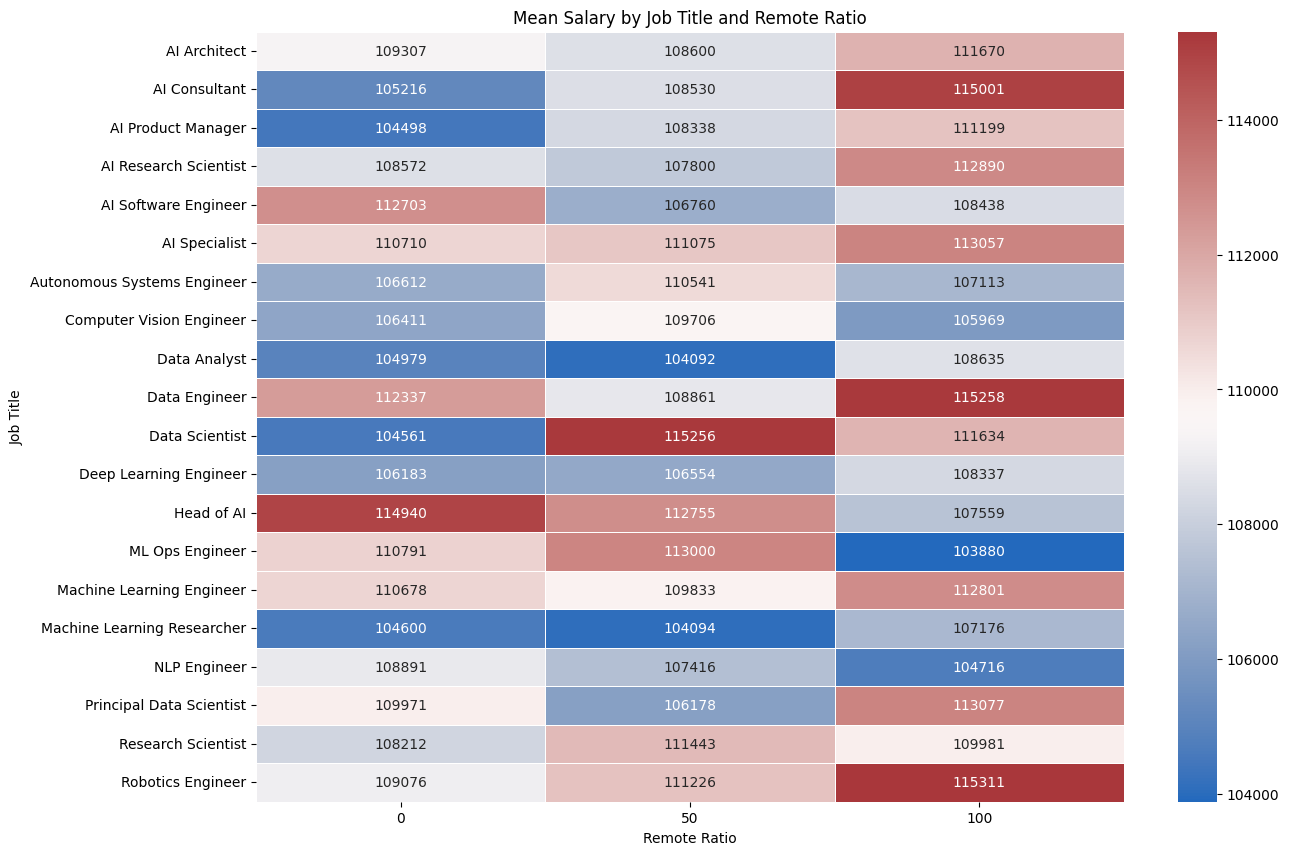

In [134]:
job_salary_remote = df_clean.groupby(['job_title', 'remote_ratio'])['salary_usd'].mean().reset_index()
pivot_table = job_salary_remote.pivot(index='job_title', columns='remote_ratio', values='salary_usd')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="vlag", linewidths=.5)
plt.title('Mean Salary by Job Title and Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Job Title')
plt.show()

In [135]:
mean_salary_by_job_title = df_clean.groupby('job_title')['salary_usd'].mean().reset_index()
top_10_job_titles = mean_salary_by_job_title.sort_values('salary_usd', ascending=False).head(10)

print('Top 10 Job Titles with Highest Average Salary:')
top_10_job_titles

Top 10 Job Titles with Highest Average Salary:


,job_title,salary_usd
9,Data Engineer,112298.945504
12,Head of AI,111982.569689
19,Robotics Engineer,111684.852703
5,AI Specialist,111628.956772
14,Machine Learning Engineer,111141.403248
10,Data Scientist,110516.658571
0,AI Architect,109859.985135
17,Principal Data Scientist,109835.129944
18,Research Scientist,109802.009763
3,AI Research Scientist,109636.739972


### Industry

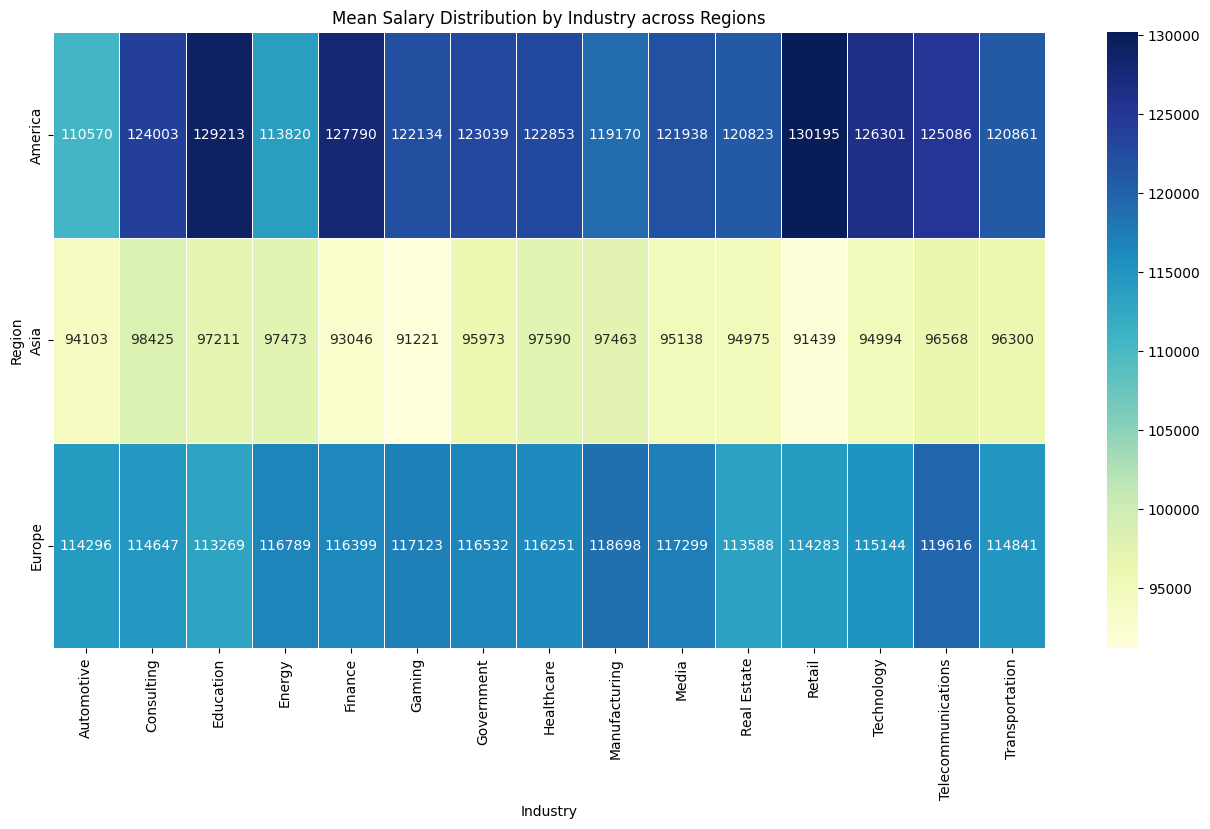

In [136]:
salary_by_region_industry = df_clean.groupby(['region', 'industry'])['salary_usd'].mean().reset_index()

pivot_table_region_industry = salary_by_region_industry.pivot(index='region', columns='industry', values='salary_usd')

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table_region_industry, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Mean Salary Distribution by Industry across Regions')
plt.xlabel('Industry')
plt.ylabel('Region')
plt.show()

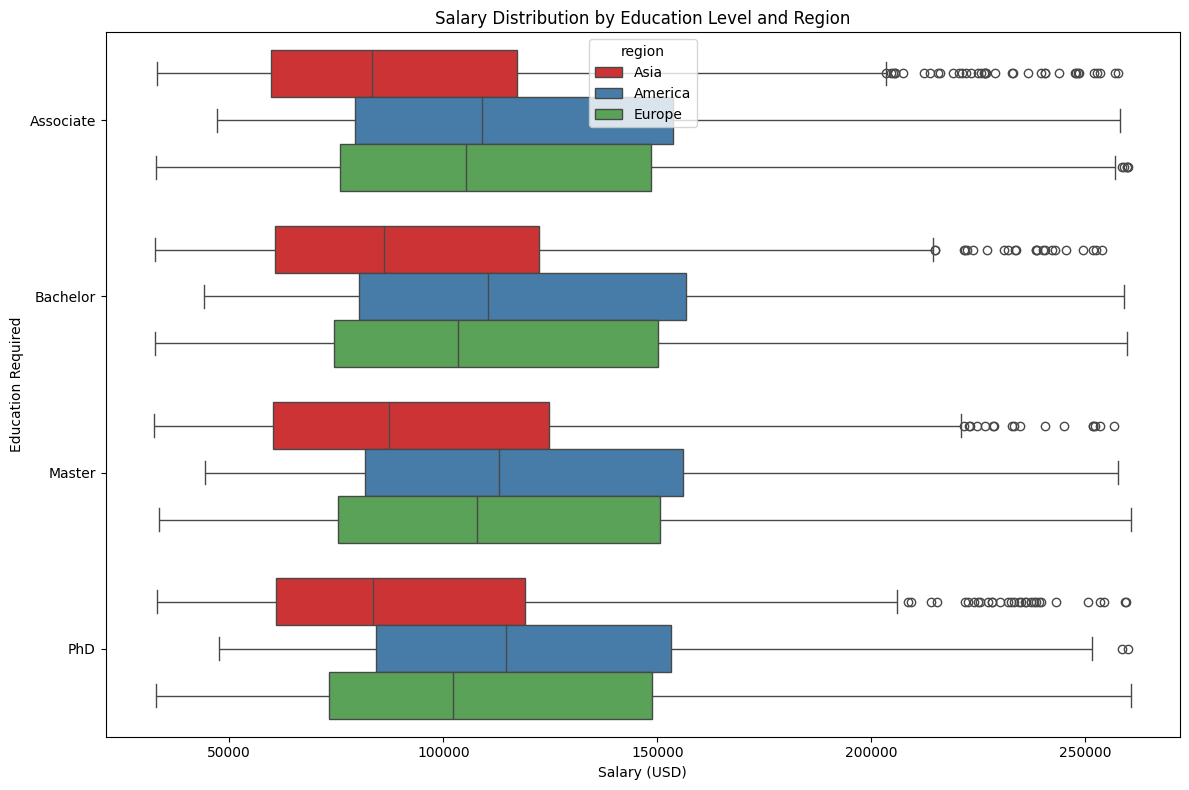

In [137]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='salary_usd', y='education_required', hue='region', data=df_clean, palette='Set1')
plt.title('Salary Distribution by Education Level and Region')
plt.xlabel('Salary (USD)')
plt.ylabel('Education Required')
plt.tight_layout()
plt.show()

In [138]:
top_employee_residence_remote = df_clean.groupby('employee_residence')['remote_ratio'].mean().reset_index()
top_100_employee_residence = top_employee_residence_remote.sort_values(by='remote_ratio', ascending=False).head(100)

print('Top 100 Employee Residence with Highest Average Remote Ratio:')
display(top_100_employee_residence)


Top 100 Employee Residence with Highest Average Remote Ratio:


,employee_residence,remote_ratio
4,Ireland,51.978172
1,India,51.776316
11,Sweden,50.589777
0,China,50.531208
5,South Korea,50.330251
18,Denmark,50.000000
7,Israel,49.931034
14,Netherlands,49.796196
10,Australia,49.789916
16,United States,49.699248


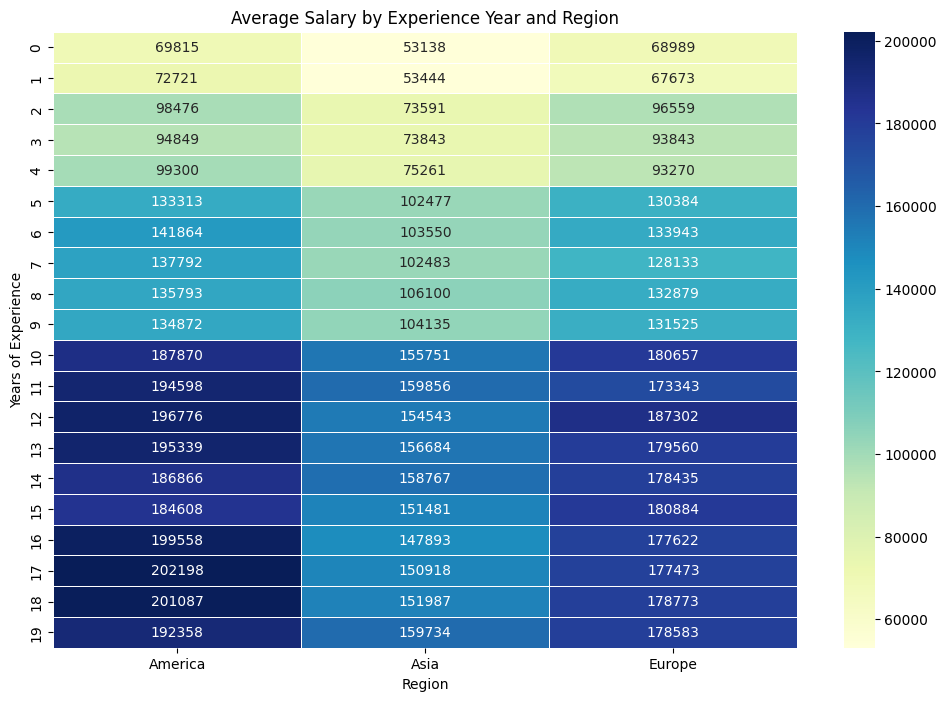

In [139]:
salary_distribution = df_clean.groupby(['years_experience', 'region'])['salary_usd'].mean().reset_index()

pivot_table = salary_distribution.pivot(index='years_experience', columns='region', values='salary_usd')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Salary by Experience Year and Region')
plt.xlabel('Region')
plt.ylabel('Years of Experience')
plt.show()

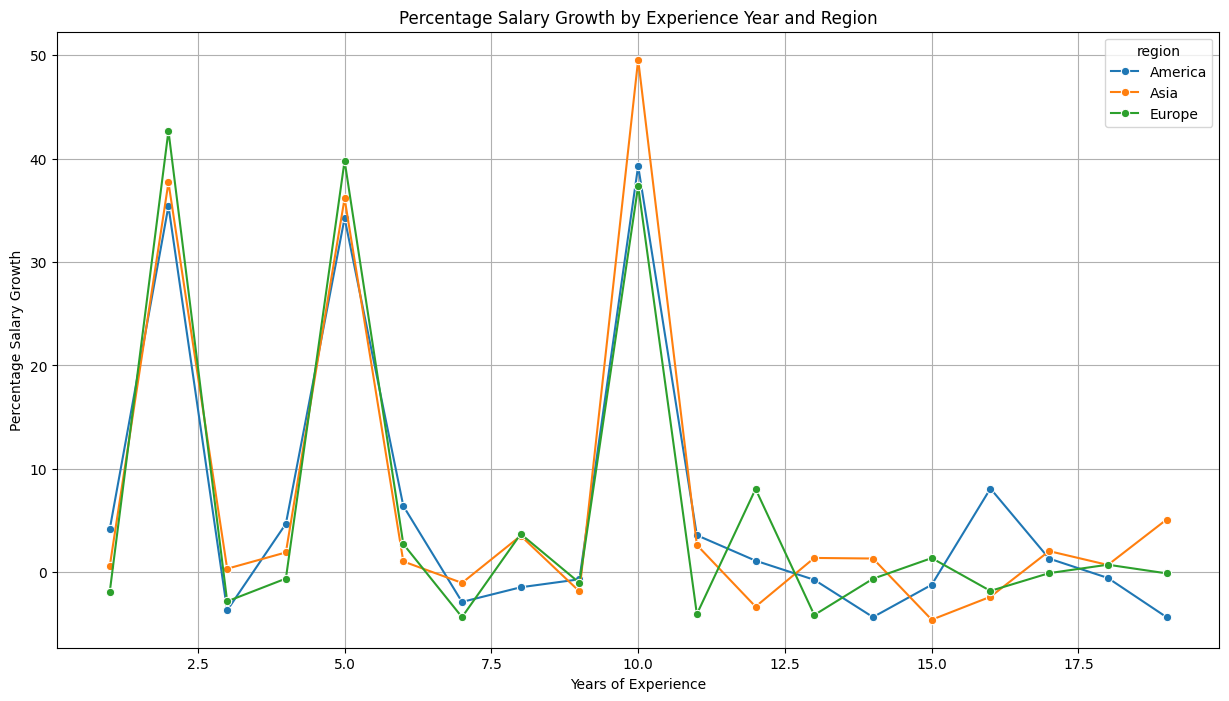

In [140]:
salary_growth_by_region = df_clean.groupby(['region', 'years_experience'])['salary_usd'].mean().reset_index()
salary_growth_by_region['salary_growth_pct'] = salary_growth_by_region.groupby('region')['salary_usd'].pct_change() * 100

plt.figure(figsize=(15, 8))
sns.lineplot(data=salary_growth_by_region, x='years_experience', y='salary_growth_pct', hue='region', marker='o')
plt.title('Percentage Salary Growth by Experience Year and Region')
plt.xlabel('Years of Experience')
plt.ylabel('Percentage Salary Growth')
plt.grid(True)
plt.show()

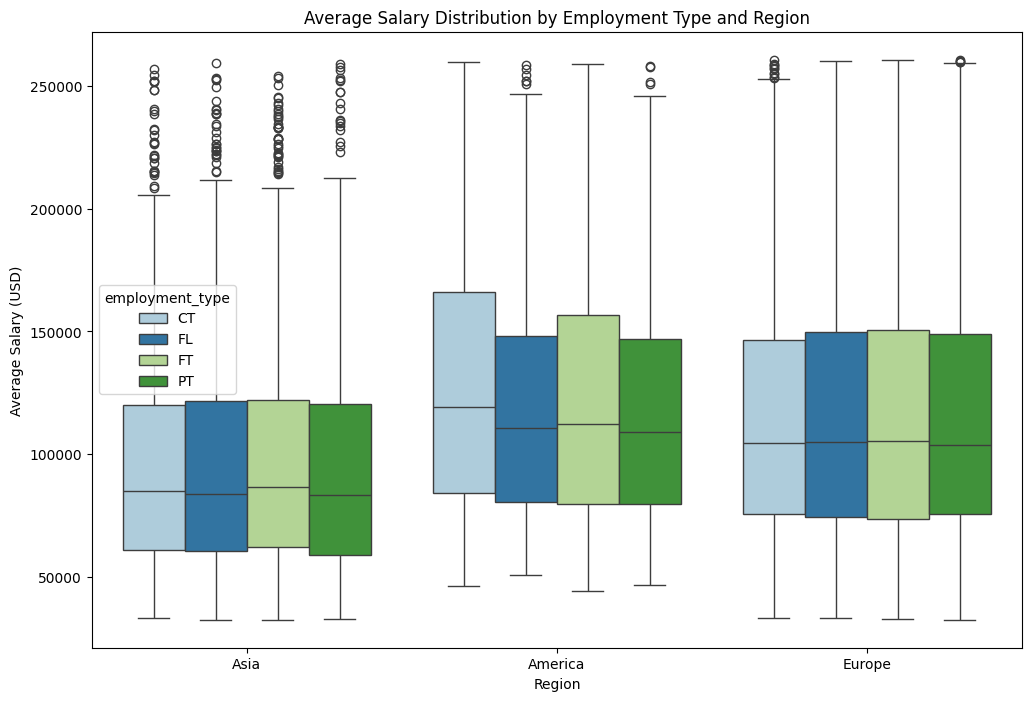

In [141]:
grouped = df_clean.groupby(['region', 'employment_type'])['salary_usd'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='salary_usd', hue='employment_type', data=df_clean, palette='Paired')
plt.title('Average Salary Distribution by Employment Type and Region')
plt.xlabel('Region')
plt.ylabel('Average Salary (USD)')
plt.show()

### Mean salary of Employment_type by remote_ratio in 3 Regions

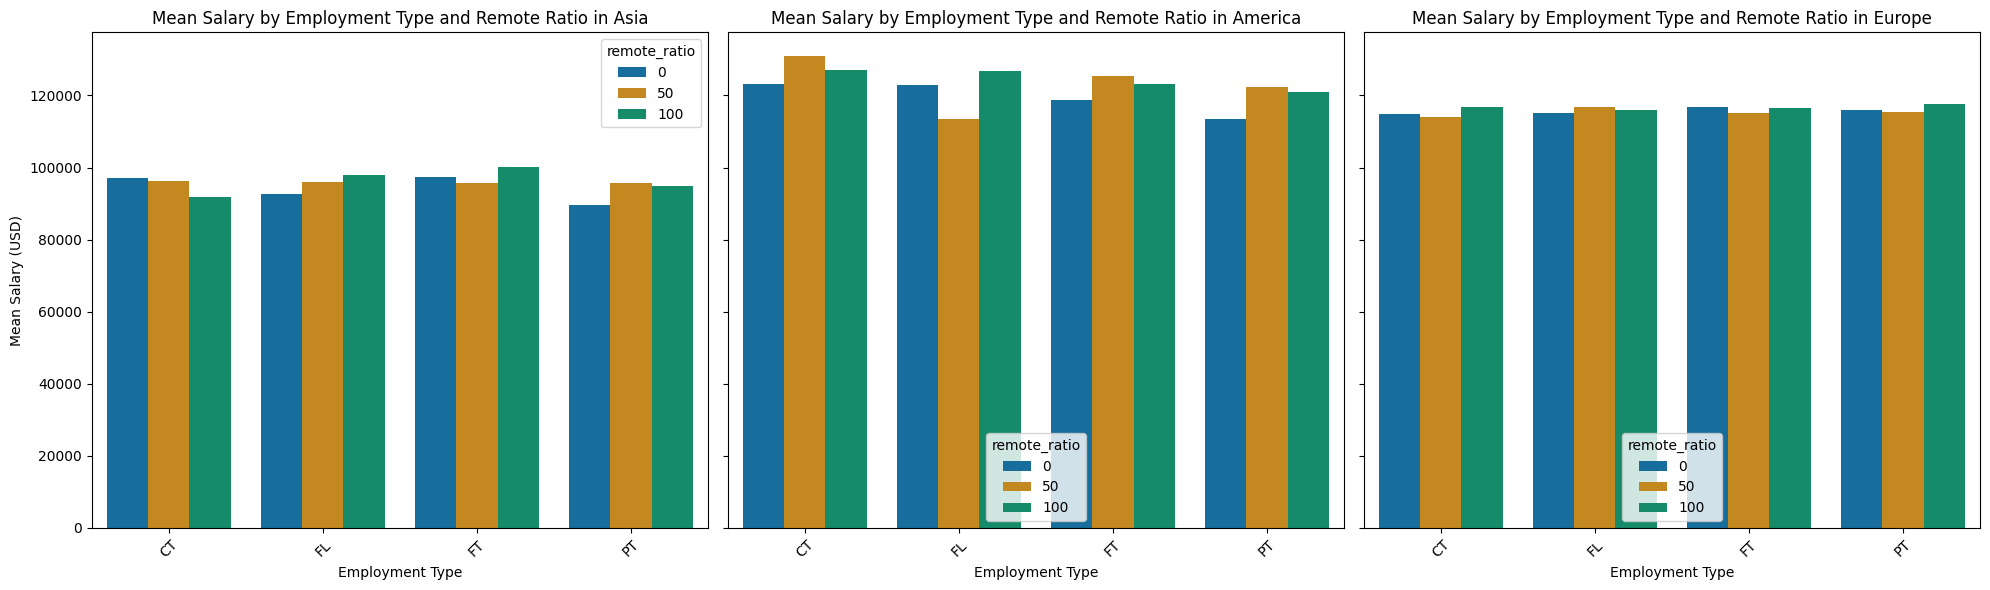

In [142]:
df_asia = df_clean[df_clean['region'] == 'Asia'].copy()
df_america = df_clean[df_clean['region'] == 'America'].copy()
df_europe = df_clean[df_clean['region'] == 'Europe'].copy()

# Group by employment type and remote ratio and calculate the mean salary for each region
grouped_asia = df_asia.groupby(['employment_type', 'remote_ratio'])['salary_usd'].mean().reset_index()
grouped_america = df_america.groupby(['employment_type', 'remote_ratio'])['salary_usd'].mean().reset_index()
grouped_europe = df_europe.groupby(['employment_type', 'remote_ratio'])['salary_usd'].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Chart 1: Asia
sns.barplot(x='employment_type', y='salary_usd', hue='remote_ratio', data=grouped_asia, ax=axes[0], palette='colorblind')
axes[0].set_title('Mean Salary by Employment Type and Remote Ratio in Asia')
axes[0].set_xlabel('Employment Type')
axes[0].set_ylabel('Mean Salary (USD)')
axes[0].tick_params(axis='x', rotation=45)

# Chart 2: America
sns.barplot(x='employment_type', y='salary_usd', hue='remote_ratio', data=grouped_america, ax=axes[1], palette='colorblind')
axes[1].set_title('Mean Salary by Employment Type and Remote Ratio in America')
axes[1].set_xlabel('Employment Type')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=45)

# Chart 3: Europe
sns.barplot(x='employment_type', y='salary_usd', hue='remote_ratio', data=grouped_europe, ax=axes[2], palette='colorblind')
axes[2].set_title('Mean Salary by Employment Type and Remote Ratio in Europe')
axes[2].set_xlabel('Employment Type')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

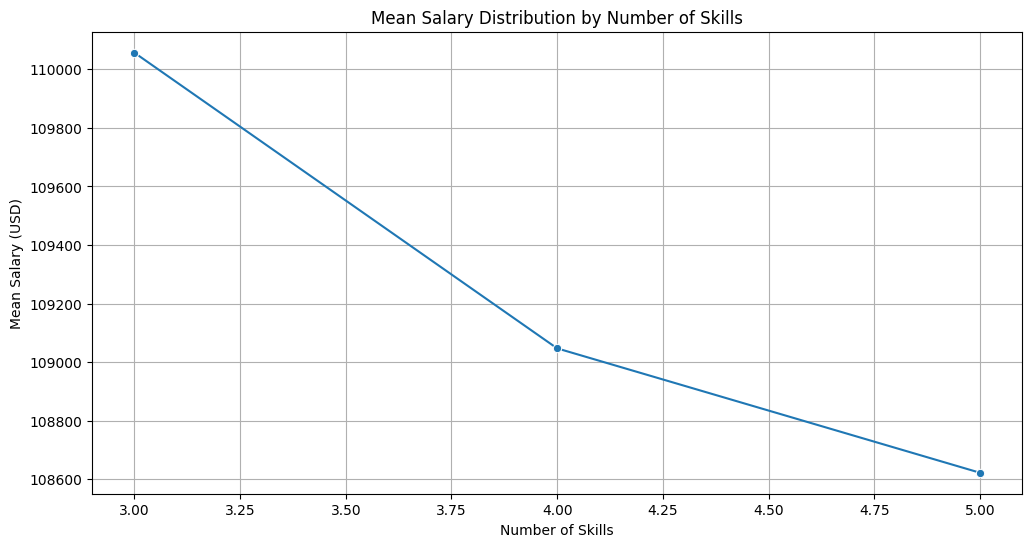

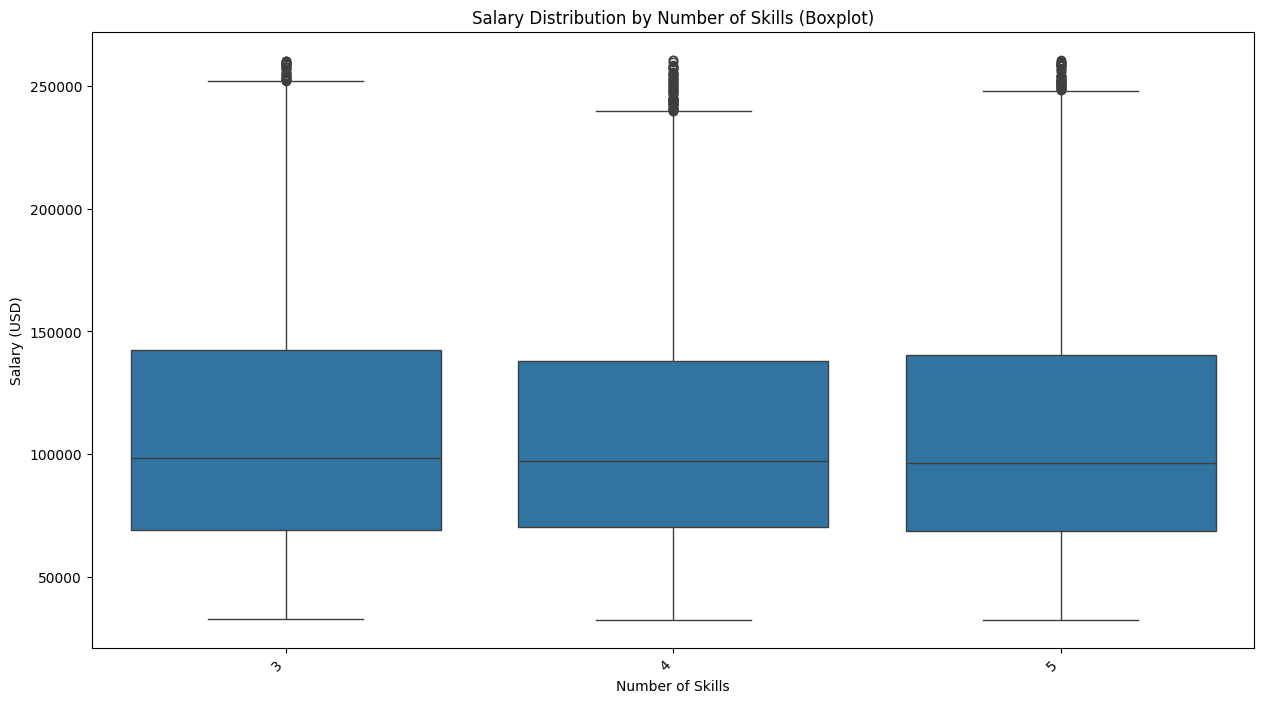

In [143]:
# Add a new column for the number of skills
df_clean['num_skills'] = df_clean['required_skills_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Group by the number of skills and calculate the mean salary
salary_by_num_skills = df_clean.groupby('num_skills')['salary_usd'].mean().reset_index()

# Sort by the number of skills for better visualization
salary_by_num_skills = salary_by_num_skills.sort_values(by='num_skills')

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.lineplot(x='num_skills', y='salary_usd', data=salary_by_num_skills, marker='o')
plt.title('Mean Salary Distribution by Number of Skills')
plt.xlabel('Number of Skills')
plt.ylabel('Mean Salary (USD)')
plt.grid(True)
plt.show()

# You might also want to see the boxplot to understand the distribution spread
plt.figure(figsize=(15, 8))
sns.boxplot(x='num_skills', y='salary_usd', data=df_clean)
plt.title('Salary Distribution by Number of Skills (Boxplot)')
plt.xlabel('Number of Skills')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

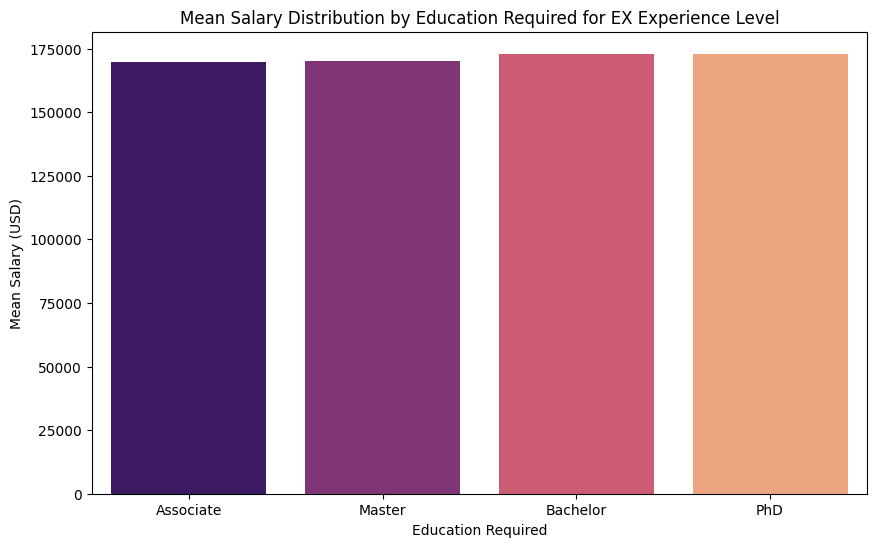

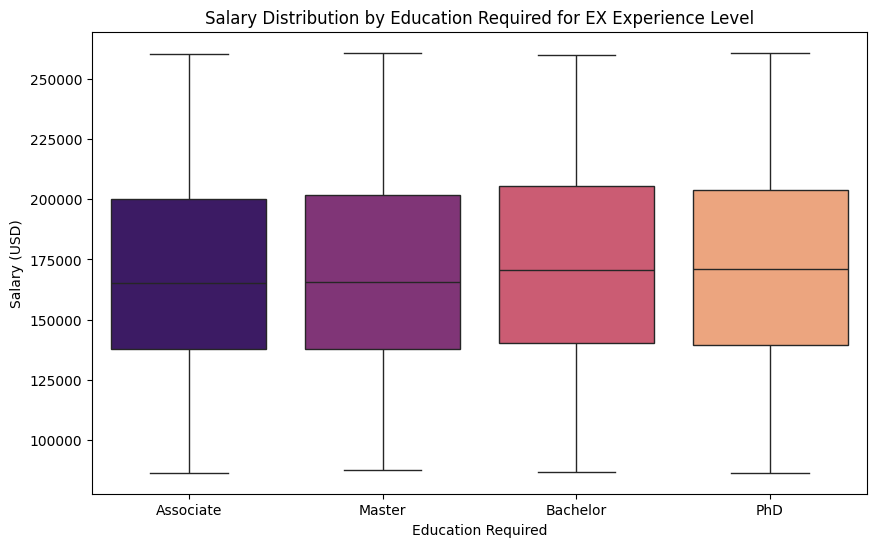

In [144]:
# Filter the DataFrame for experience_level = 'EX'
df_ex = df_clean[df_clean['experience_level'] == 'EX'].copy()

# Group by education_required and calculate the mean salary
salary_by_education_ex = df_ex.groupby('education_required')['salary_usd'].mean().reset_index()

# Sort by mean salary in ascending order for plotting
salary_by_education_ex = salary_by_education_ex.sort_values('salary_usd', ascending=True)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='education_required', y='salary_usd', data=salary_by_education_ex, palette='magma', order=salary_by_education_ex['education_required'])
plt.title('Mean Salary Distribution by Education Required for EX Experience Level')
plt.xlabel('Education Required')
plt.ylabel('Mean Salary (USD)')
plt.show()

# You can also show the boxplot for better understanding of the distribution spread
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_required', y='salary_usd', data=df_ex, palette='magma', order=salary_by_education_ex['education_required'])
plt.title('Salary Distribution by Education Required for EX Experience Level')
plt.xlabel('Education Required')
plt.ylabel('Salary (USD)')
plt.show()

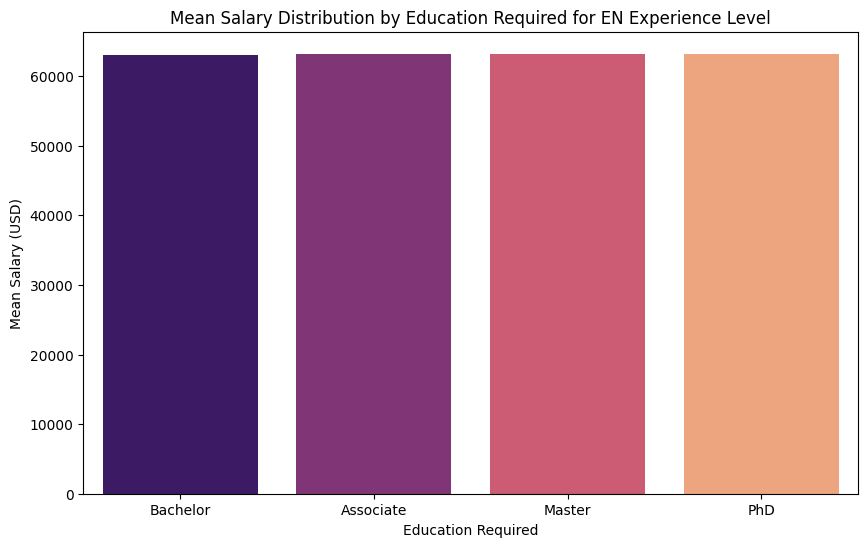

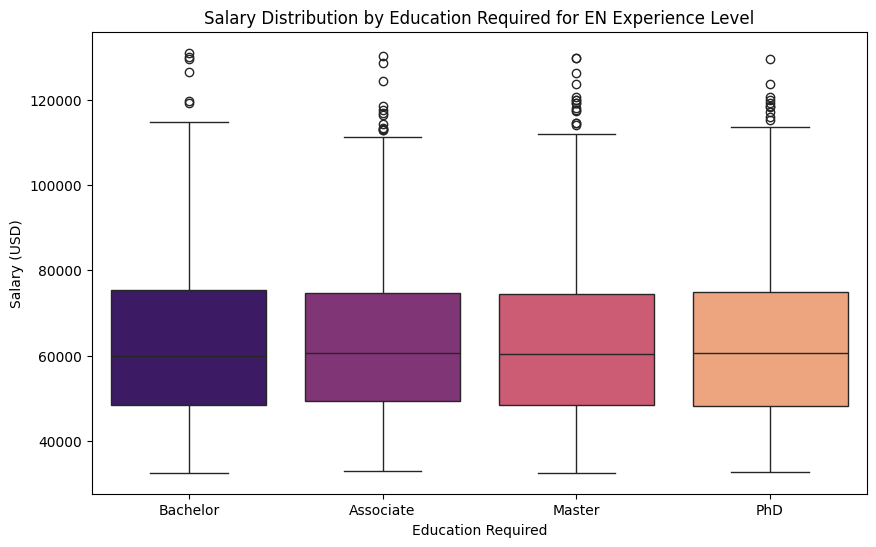

In [145]:

# Filter the DataFrame for experience_level = 'EN'
df_en = df_clean[df_clean['experience_level'] == 'EN'].copy()

# Group by education_required and calculate the mean salary
salary_by_education_en = df_en.groupby('education_required')['salary_usd'].mean().reset_index()

# Sort by mean salary in ascending order for plotting
salary_by_education_en = salary_by_education_en.sort_values('salary_usd', ascending=True)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='education_required', y='salary_usd', data=salary_by_education_en, palette='magma', order=salary_by_education_en['education_required'])
plt.title('Mean Salary Distribution by Education Required for EN Experience Level')
plt.xlabel('Education Required')
plt.ylabel('Mean Salary (USD)')
plt.show()

# You can also show the boxplot for better understanding of the distribution spread
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_required', y='salary_usd', data=df_en, palette='magma', order=salary_by_education_en['education_required'])
plt.title('Salary Distribution by Education Required for EN Experience Level')
plt.xlabel('Education Required')
plt.ylabel('Salary (USD)')
plt.show()

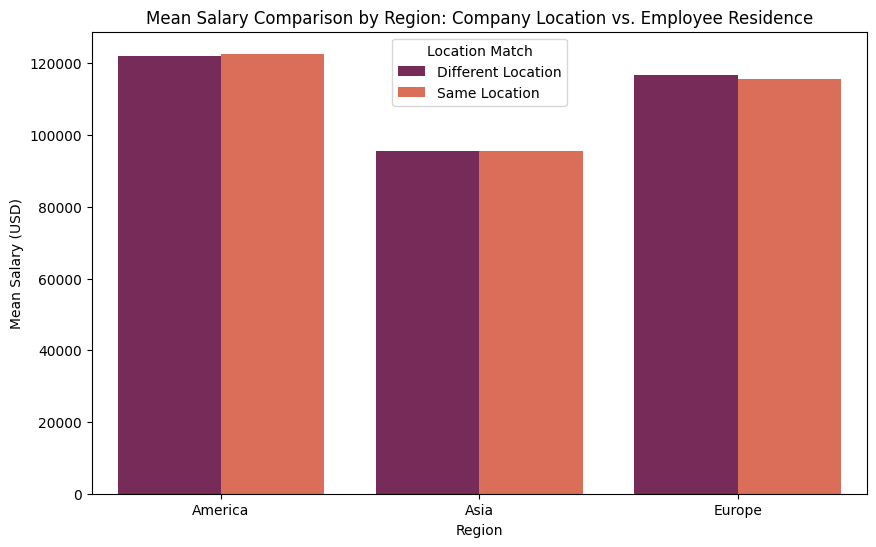

In [151]:
# Create a column to indicate if company location and employee residence are the same
df_clean['same_location'] = (df_clean['company_location'].astype(str) == df_clean['employee_residence'].astype(str))

# Group by region and 'same_location' and calculate the mean salary
salary_comparison = df_clean.groupby(['region', 'same_location'])['salary_usd'].mean().reset_index()

# Map boolean values to descriptive strings for the plot legend
salary_comparison['Location Match'] = salary_comparison['same_location'].map({True: 'Same Location', False: 'Different Location'})

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='salary_usd', hue='Location Match', data=salary_comparison, palette='rocket')
plt.title('Mean Salary Comparison by Region: Company Location vs. Employee Residence')
plt.xlabel('Region')
plt.ylabel('Mean Salary (USD)')
plt.show()

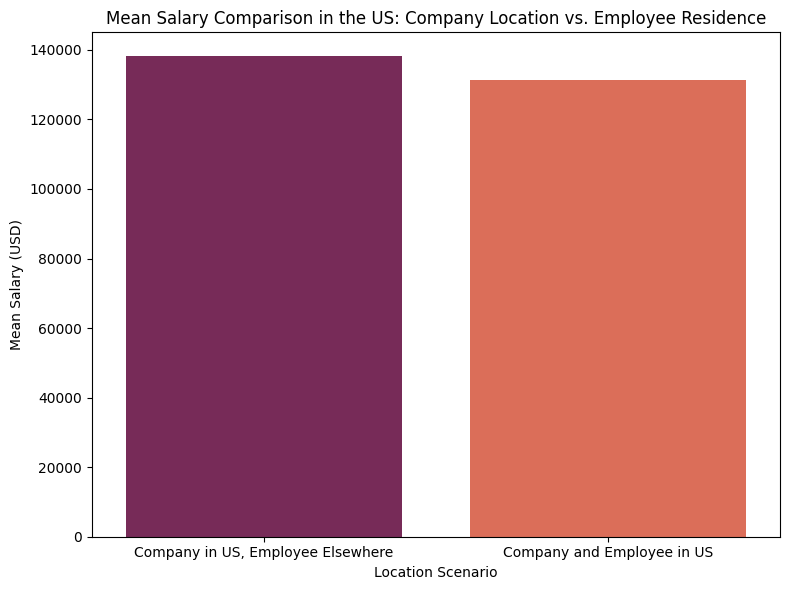

In [150]:
# Filter data for the US
df_us = df_clean[df_clean['company_location'] == 'United States'].copy()

# Create the 'same_location_us' column for US data only
df_us['same_location_us'] = (df_us['company_location'].astype(str) == df_us['employee_residence'].astype(str))

# Group by the 'same_location_us' column and calculate the mean salary
salary_comparison_us = df_us.groupby('same_location_us')['salary_usd'].mean().reset_index()

# Map boolean values to descriptive strings for the plot legend
salary_comparison_us['Location Match'] = salary_comparison_us['same_location_us'].map({True: 'Company and Employee in US', False: 'Company in US, Employee Elsewhere'})

# Create the bar chart for the US comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Location Match', y='salary_usd', data=salary_comparison_us, palette='rocket')
plt.title('Mean Salary Comparison in the US: Company Location vs. Employee Residence')
plt.xlabel('Location Scenario')
plt.ylabel('Mean Salary (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()